# Mikołaj Pietrynko
# IoT Network Intrusion Dataset - Data Science IDDS_2025
#### https://www.kaggle.com/datasets/rohulaminlabid/iotid20-dataset?utm_source=chatgpt.com


##### Dataset designed to detect IoT Networks attacks.


Notes:
1. 

In [581]:
import math

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [582]:
# Read data from .csv to pandas DataFrame
df = pd.read_csv("IoT Network Intrusion Dataset.csv")

In [583]:
# First view on dataset
df.head(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,...,0.0,0.0,0.0,78.50,6.363961,83.0,74.0,Anomaly,Mirai,Mirai-Hostbruteforceg
6,192.168.0.24-210.89.164.90-60175-8899-17,192.168.0.24,60175,210.89.164.90,8899,17,25/07/2019 03:21:01 AM,139,20,1,...,0.0,0.0,0.0,6.95,1.669384,10.0,4.0,Anomaly,Mirai,Mirai-UDP Flooding
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,...,0.0,0.0,0.0,112.00,0.000000,112.0,112.0,Anomaly,Scan,Scan Port OS
8,192.168.0.13-210.89.164.90-60132-8899-17,192.168.0.13,60132,210.89.164.90,8899,17,25/07/2019 03:21:13 AM,86,1,1,...,0.0,0.0,0.0,86.00,0.000000,86.0,86.0,Anomaly,Mirai,Mirai-UDP Flooding
9,192.168.0.13-111.149.163.151-554-7953-6,111.149.163.151,7953,192.168.0.13,554,6,26/05/2019 10:20:36 PM,6799,0,2,...,0.0,0.0,0.0,6799.00,0.000000,6799.0,6799.0,Anomaly,DoS,DoS-Synflooding


In [584]:

# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

# columns Description:

#### Time statistics:
* DDoS attack has short duration but intense frame rate
6. Timestamp
7. Flow_Duration
    
#### Packet statistics:
* Lots of packet & small amount of carried info - suspicious
8. Tot_Fwd_Pkts - number of packets from src to dst (Forward)
9. Tot_Bwd_Pkts - number of packets from dst to src (Backward)
10. TotLen_Fwd_Pkts - total number of forward bytes
11. TotLen_Bwd_Pkts - total number of backward bytes

#### Packet sizes:
* Low value of variance - suspicious (botnet)
* In case of normal traffic variance should be bigger
12.  Fwd_Pkt_Len_Max - max forward packet length
13.  Fwd_Pkt_Len_Min - min forward packet length
14.  Fwd_Pkt_Len_Mean - average forward packet length
15.  Fwd_Pkt_Len_Std - standard deviation forward packet length
16.  Bwd_Pkt_Len_Max - etc....
17.  Bwd_Pkt_Len_Min 
18.  Bwd_Pkt_Len_Mean
19.  Bwd_Pkt_Len_Std 

#### Flow statistics:
* extremly high flows for ddos attacks
20. Flow_Byts/s - bytes per sec
21. Flow_Pkts/s - packets per sec

#### Inter Arrival Times:
* constant time between packets might be caused by bots
22. Flow_IAT_Mean - mean t between packets
23. Flow_IAT_Std  - standard deviation time between packets
24. Flow_IAT_Max  - max time between packets
25. Flow_IAT_Min  - min times between packets etc. to 35>

#### Flags:
* e.g. SYN flood for only SYN flags, no ACK flags, in case of TCP protocol flags are balaced
49. FIN_Flag_Cnt   -  counter etc...
50. SYN_Flag_Cnt   -  
51. RST_Flag_Cnt   -  
52. PSH_Flag_Cnt   -  
53. ACK_Flag_Cnt   -  
54. URG_Flag_Cnt   -  
55. CWE_Flag_Count -  
56. ECE_Flag_Cnt   - 

#### TCP session info:
* short session,  no idle - possible attack
71. Init_Fwd_Win_Byts - init packet size fw
72. Init_Bwd_Win_Byts - init packet size bw
73. Fwd_Act_Data_Pkts - 
74. Fwd_Seg_Size_Min  - min segment size
75. Active_Mean       - active time mean
76. Active_Std        - active time std

In [585]:
display(df["Label"].value_counts())
display(df["Cat"].value_counts())
display(df["Sub_Cat"].value_counts())

Label
Anomaly    585710
Normal      40073
Name: count, dtype: int64

Cat
Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: count, dtype: int64

Sub_Cat
Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: count, dtype: int64

#### Labels:
1. Label - Anomaly / Normal
2. Cat - Type of anomaly
3. datailed anomaly

In [586]:
df.describe()

/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000


##### We can not say much from describe table at this moment. There are some outstanding values but it should not be any measurement error because it's a shoot from network tool like WireShark

In [587]:
print("Missing values in each column:")
display(df.isnull().sum())
print("Total missing values:")
display(df.isnull().sum().sum())

Missing values in each column:


Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

Total missing values:


np.int64(0)

No missing Values found.

In [588]:
# check infinity values
inf_cnt = np.isinf(df.select_dtypes(include=[np.number])).sum()
display(inf_cnt[inf_cnt > 0])

Flow_Byts/s    368
Flow_Pkts/s    368
dtype: int64

In [589]:
# display inf example rows
inf_cols = inf_cnt[inf_cnt > 0].index 
mask_inf = np.isinf(df[inf_cols]).any(axis=1)
df.loc[mask_inf, inf_cols].head(10)

,Flow_Byts/s,Flow_Pkts/s
4532,inf,inf
6605,inf,inf
7463,inf,inf
7962,inf,inf
12705,inf,inf
16058,inf,inf
17045,inf,inf
22333,inf,inf
26127,inf,inf
28813,inf,inf


Infs are from dividing by 0 eg. number_of_bytes / session_time is case session_time = 0. Impute 99.9 percyl value (less than 0.01%)

In [590]:
for col in inf_cols:
    finite_vals = df.loc[np.isfinite(df[col]), col]
    cap = finite_vals.quantile(0.99)
    df[col] = df[col].replace([np.inf, -np.inf], cap)

# check infinity values
inf_cnt = np.isinf(df.select_dtypes(include=[np.number])).sum()
display(inf_cnt[inf_cnt > 0])

Series([], dtype: int64)

In [591]:
# Delet some columns that does not carry useful information : There is already an index column and flow duration
df = df.drop(columns=["Flow_ID", "Dst_IP", "Src_IP", "Timestamp"])

# delet ports: in IoT devices ports are often random and do not carry useful information
df = df.drop(columns=["Src_Port", "Dst_Port"])

# At this moment remove detailed attack type
df = df.drop(columns=["Cat", "Sub_Cat"])

In [592]:
# Look for low variance features - columns with only one unique value do not provide useful information
nunique = df.nunique()
low_variance_cols = nunique[nunique <= 1].index
low_variance_cols
df = df.drop(columns=low_variance_cols)

In [593]:
# Check datatypes
df.dtypes.value_counts()

float64    45
int64      22
object      1
Name: count, dtype: int64

In [594]:
# display object columns
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns in the dataset:")
for col in object_columns:
    print(col)

Object columns in the dataset:
Label


Mainly Intigers and Floats. Only Label - Target Variable - is an object - ok.

In [595]:
df["Label"].value_counts(normalize=True)

Label
Anomaly    0.935963
Normal     0.064037
Name: proportion, dtype: float64

Target Variable is strongly disbalanced!

## 2. Plots


In [596]:
def plot_histograms(dataframe):
    ''' Plot histograms for all numeric columns in the dataframe.'''
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    n = len(numeric_columns)

    plt_cols = 2
    plt_rows = math.ceil(n / plt_cols)

    # sns.set(style="darkgrid")
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020",
    })
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(12, plt_rows * 4))
    axes = axes.flatten()   #to easily iterate over axes

    for i, col in enumerate(numeric_columns):
        sns.histplot(ax=axes[i], data=dataframe, x=col, bins=30, kde=True, color='red')
        axes[i].set_title(f"Boxplot: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].grid(True)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].label="Histogram"

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


In [597]:
def plot_boxplots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    n = len(numeric_columns)

    plt_cols = 2
    plt_rows = math.ceil(n / plt_cols)

    # sns.set(style="whitegrid")
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020"
    })
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(12, plt_rows * 4))
    axes = axes.flatten()   #to easily iterate over axes

    for i, col in enumerate(numeric_columns):
        sns.boxplot(ax=axes[i], data=dataframe, x=col, color='red')
        axes[i].set_title(f"Boxplot: {col}")
        axes[i].set_xlabel(col)
        axes[i].grid(True)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].label="Boxplot"

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

In [598]:
def plot_histograms_by_label(dataframe, label_column='Label'):
    ''' Plot histograms for all numeric columns in the dataframe, separated by Label.'''
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    labels = dataframe['Label'].unique()
    n = len(numeric_columns)

    plt_cols = 2
    plt_rows = math.ceil(n / plt_cols)

    # sns.set(style="darkgrid")
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020",
    })
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(12, plt_rows * 4))
    axes = axes.flatten()   #to easily iterate over axes

    for i, col in enumerate(numeric_columns):
        sns.histplot(ax=axes[i], data=dataframe, x=col, hue=label_column, bins=30, kde=True)
        axes[i].set_title(f"Histogram by Label: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].grid(True)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].label="Histogram by Label"

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


In [599]:
# def plot_scattermatrix(dataframe):
#     ''' Plot scatter matrix for all numeric columns in the dataframe.'''
#     from pandas.plotting import scatter_matrix

#     numeric_columns = dataframe.select_dtypes(include=['number']).columns
#     sns.set_theme(style="dark")
#     plt.rcParams.update({
#         "figure.facecolor": "black",
#         "axes.facecolor": "black",
#         "axes.edgecolor": "white",
#         "axes.labelcolor": "white",
#         "xtick.color": "white",
#         "ytick.color": "white",
#         "text.color": "white",
#         "grid.color": "#202020"
#     })
#     scatter_matrix(dataframe[numeric_columns], alpha=0.2, figsize=(12, 12), diagonal='kde', color='red')
#     plt.suptitle("Scatter Matrix of Numeric Features", color='white')
#     plt.show()

best to differ attack from normal:

- Flow_Byts/s
- Flow_Pkts/s
- Tot_Fwd_Pkts
- Tot_Bwd_Pkts
 ---------------
- Flow_Duration
- Flow_IAT_Mean
- Flow_IAT_Std
 ---------------
- Pkt_Len_Mean
- Pkt_Len_Std
 ---------------
- Active_Mean
- Idle_Mean


### Raw data plots

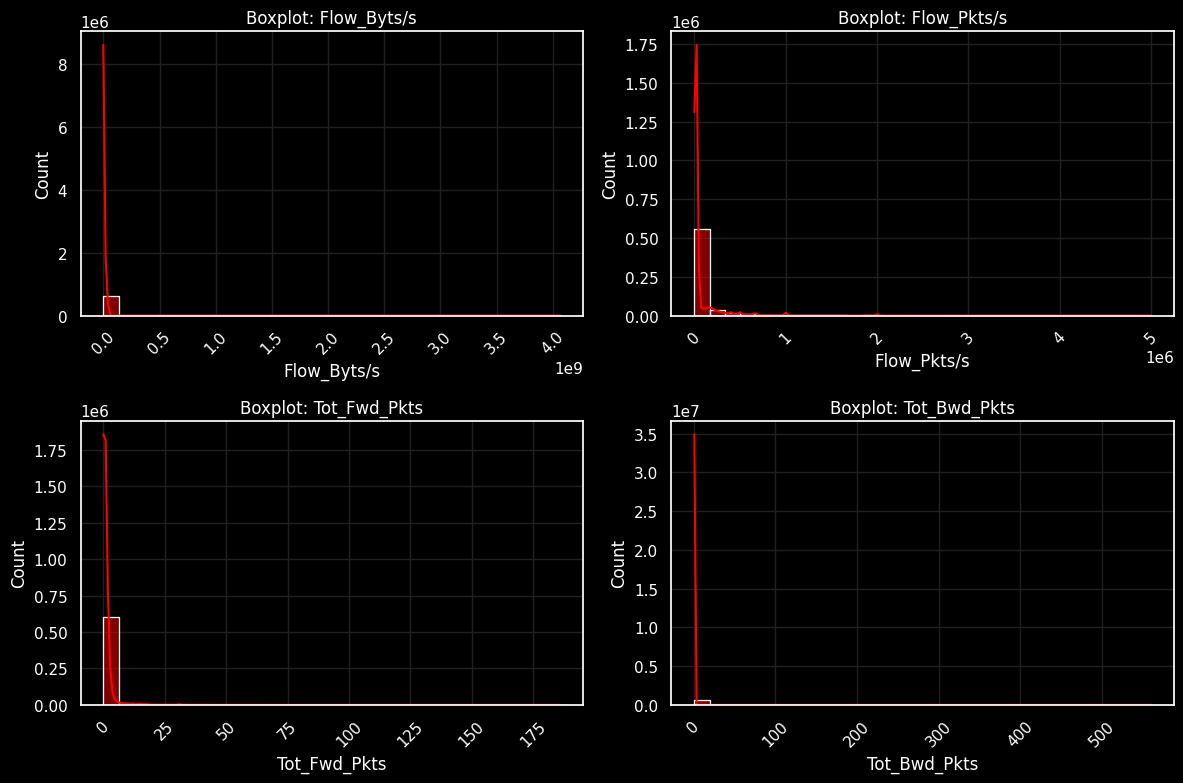

In [600]:
# Transimssion intensity features
col_to_hist = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
plot_histograms(df[col_to_hist])

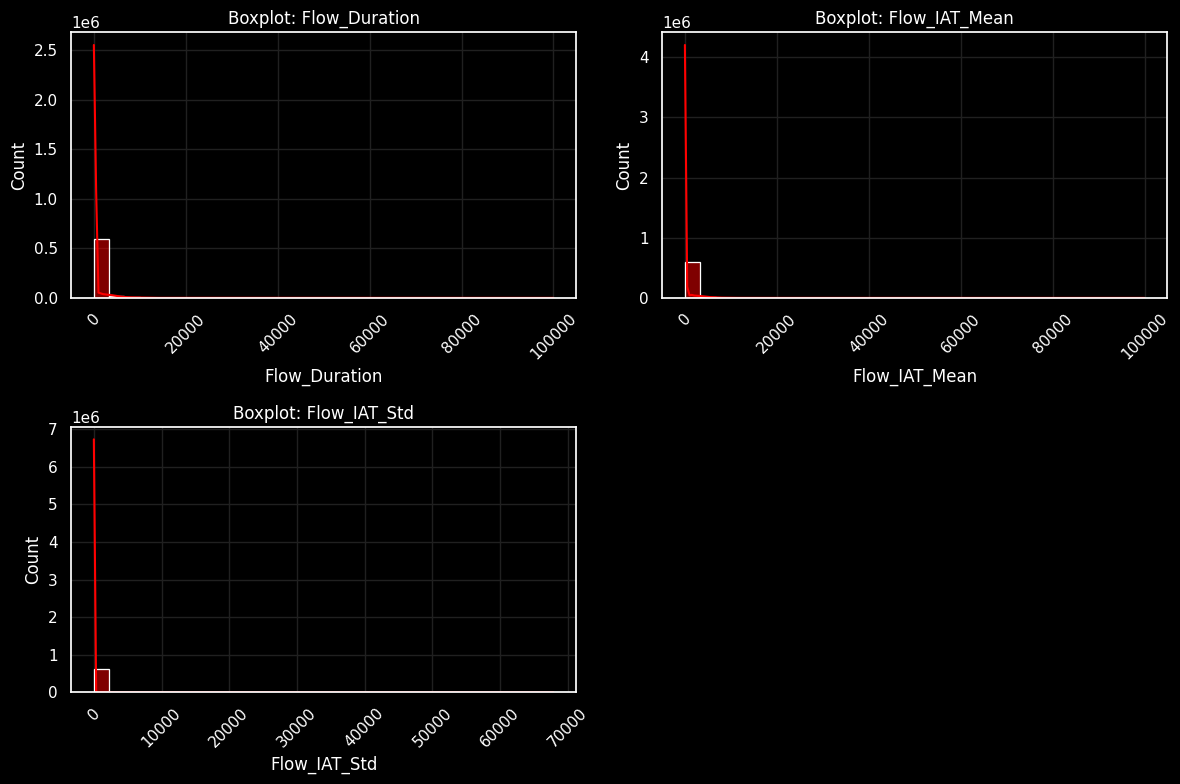

In [601]:
# Transmission regular features
col_to_hist = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
plot_histograms(df[col_to_hist])

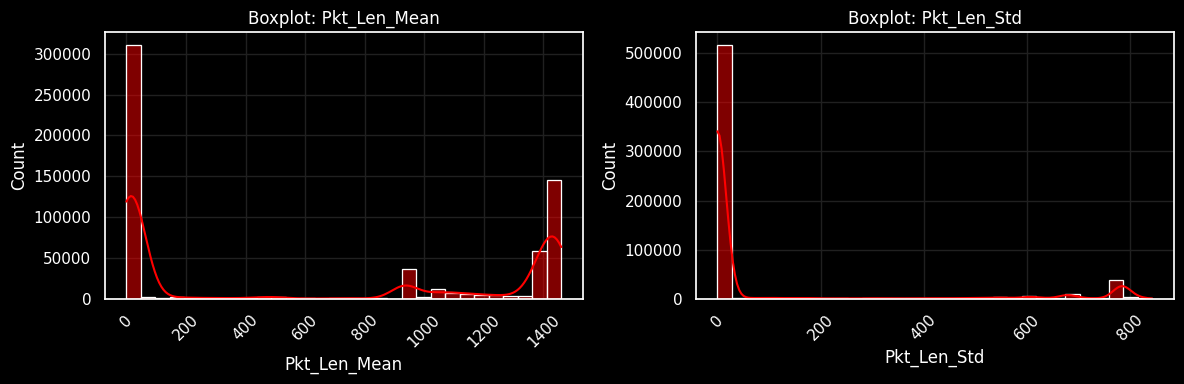

In [602]:
# Transmission packet sizes
col_to_hist = ['Pkt_Len_Mean', 'Pkt_Len_Std']
plot_histograms(df[col_to_hist])

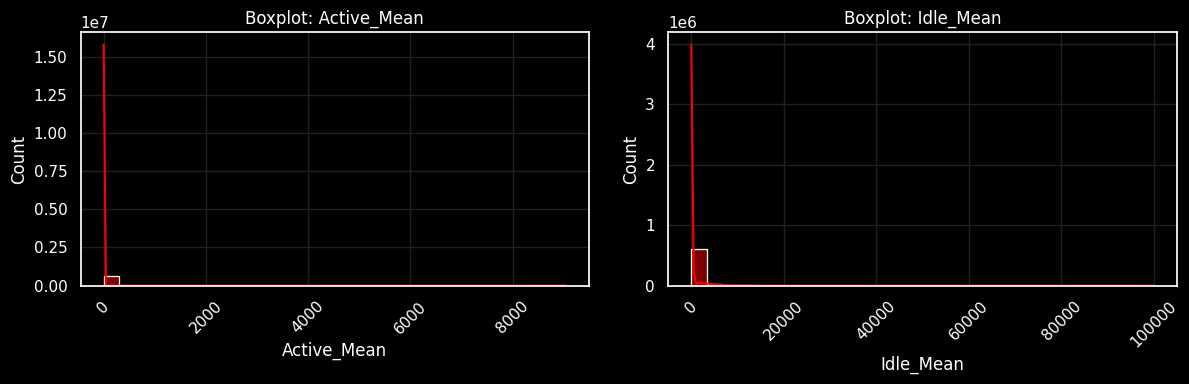

In [603]:
# activity
col_to_hist = ['Active_Mean', 'Idle_Mean']
plot_histograms(df[col_to_hist])

### Results:
To w zasadzie jest nieczytelne. Widać tylko jakiś pik po lewej stronie, na podstawie czego moge stwierdzić że większość danych jest z małą wartością i występują jakieś outliery. Wykresy skośne prawostronnie.

### Log data plots

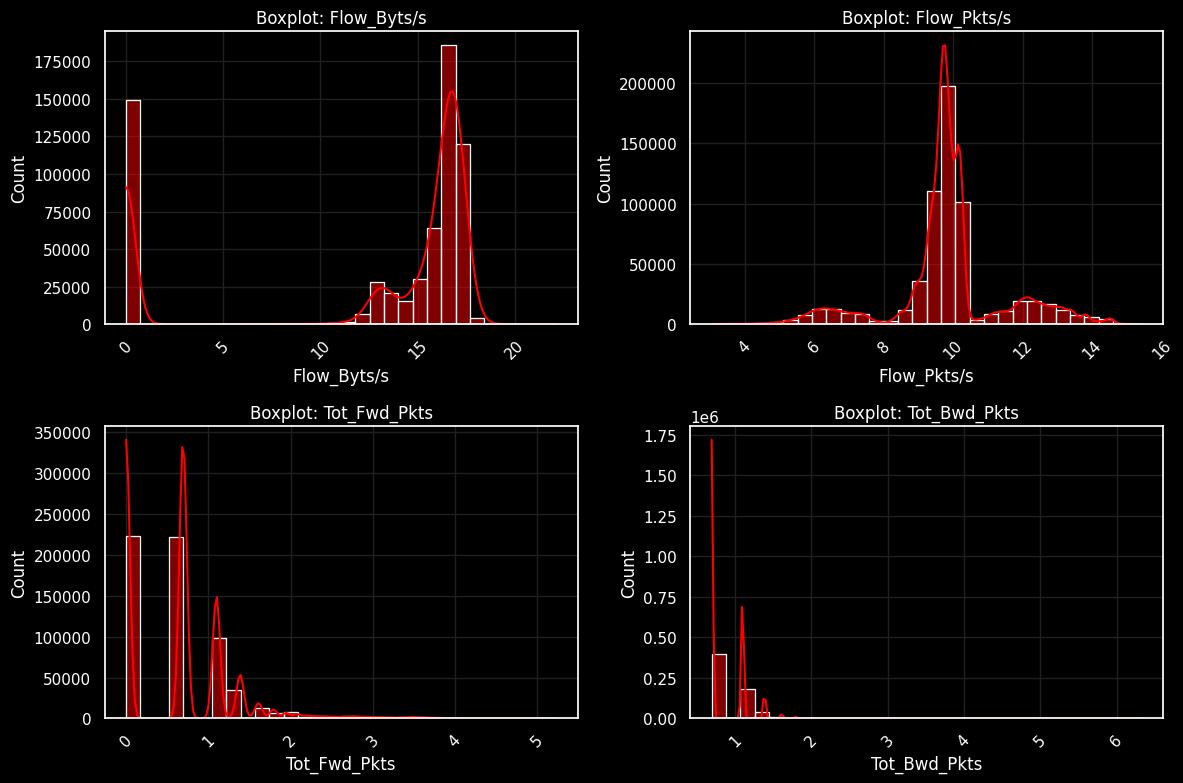

In [604]:
col = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)

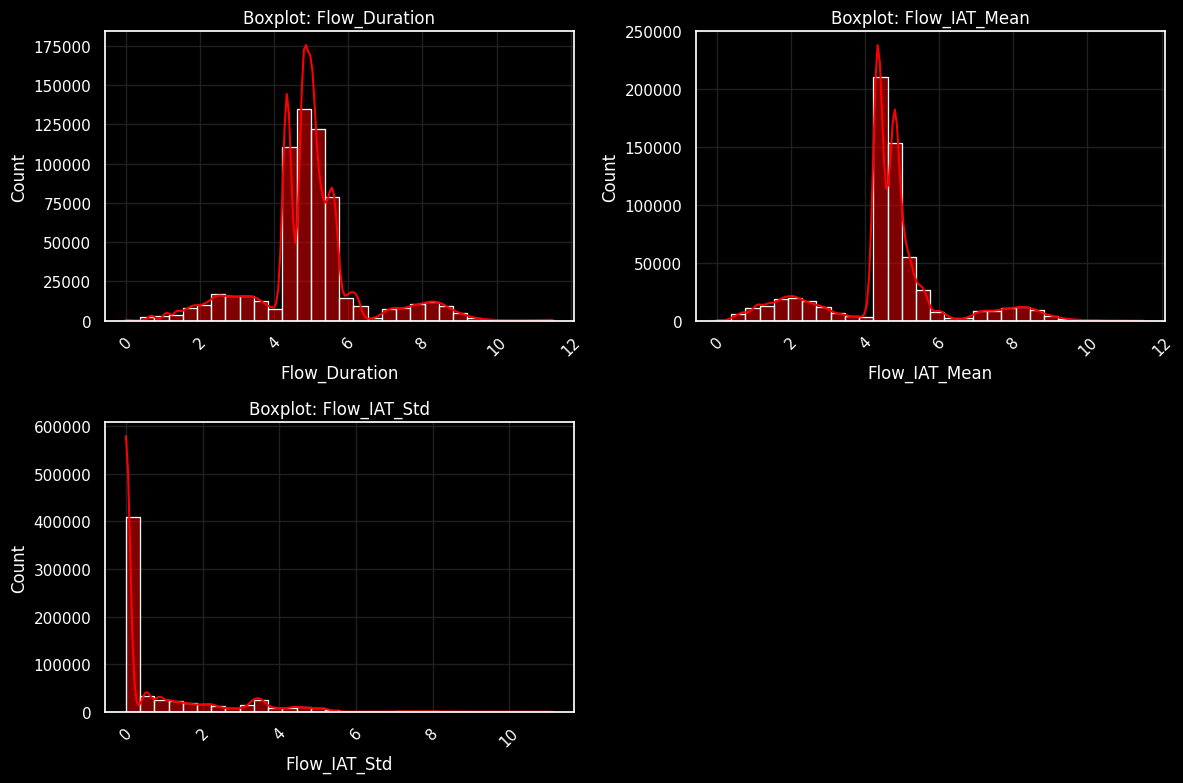

In [605]:
# Transmission regular features
col = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)


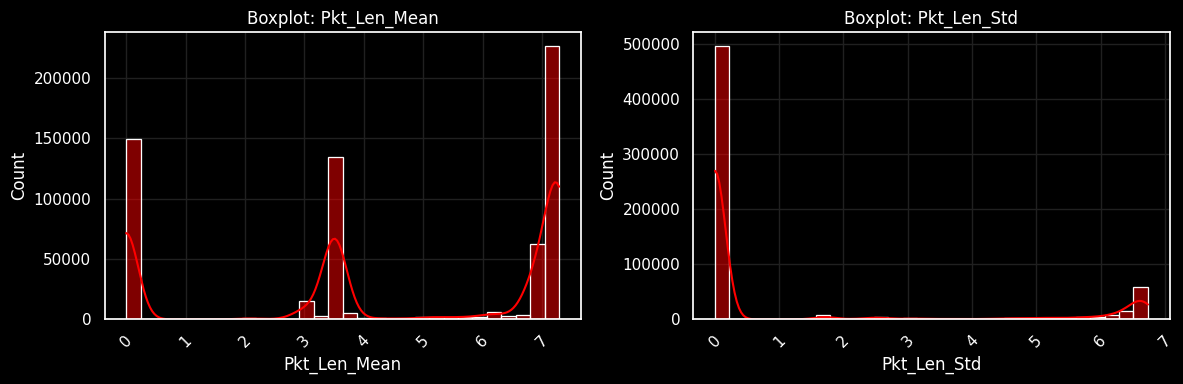

In [606]:
# Transmission packet sizes
col = ['Pkt_Len_Mean', 'Pkt_Len_Std']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)

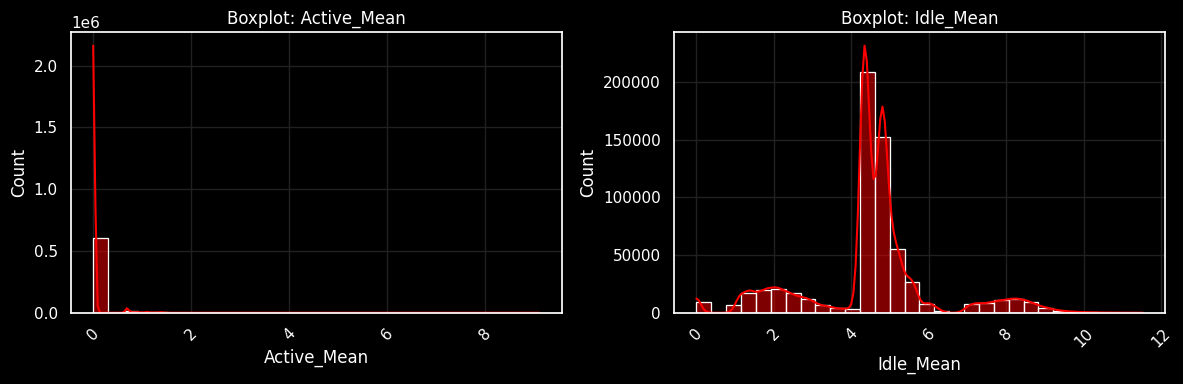

In [607]:
# activity
col = ['Active_Mean', 'Idle_Mean']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)


Dane w skali logartymicznej są czytelniejsze. Po transformacji ujawniła się struktura rozkładów, umożliwiająca identyfikację różnych profili ruchu sieciowego oraz obserwacji odstających odpowiadających atakom.

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 68 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Protocol           625783 non-null  int64  
 1   Flow_Duration      625783 non-null  int64  
 2   Tot_Fwd_Pkts       625783 non-null  int64  
 3   Tot_Bwd_Pkts       625783 non-null  int64  
 4   TotLen_Fwd_Pkts    625783 non-null  float64
 5   TotLen_Bwd_Pkts    625783 non-null  float64
 6   Fwd_Pkt_Len_Max    625783 non-null  float64
 7   Fwd_Pkt_Len_Min    625783 non-null  float64
 8   Fwd_Pkt_Len_Mean   625783 non-null  float64
 9   Fwd_Pkt_Len_Std    625783 non-null  float64
 10  Bwd_Pkt_Len_Max    625783 non-null  float64
 11  Bwd_Pkt_Len_Min    625783 non-null  float64
 12  Bwd_Pkt_Len_Mean   625783 non-null  float64
 13  Bwd_Pkt_Len_Std    625783 non-null  float64
 14  Flow_Byts/s        625783 non-null  float64
 15  Flow_Pkts/s        625783 non-null  float64
 16  Fl

## Boxplots

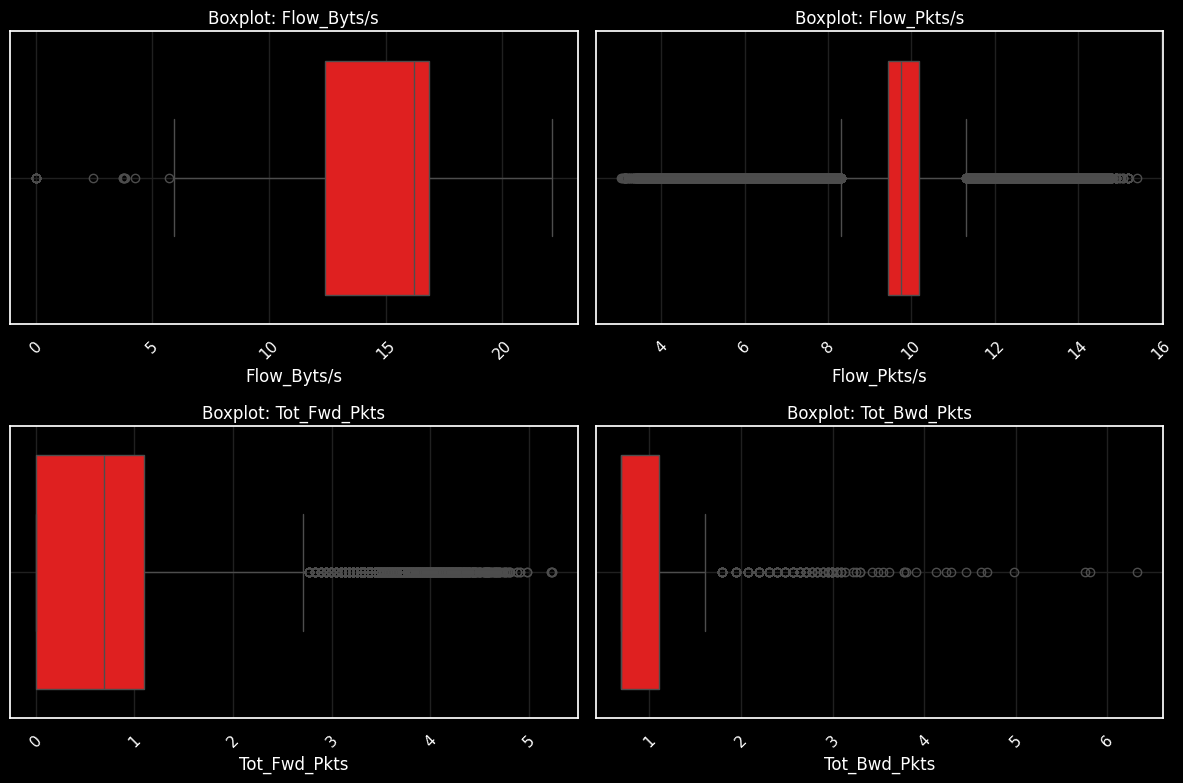

In [609]:
# Boxplots of log transformed features, for better visualization
col = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)


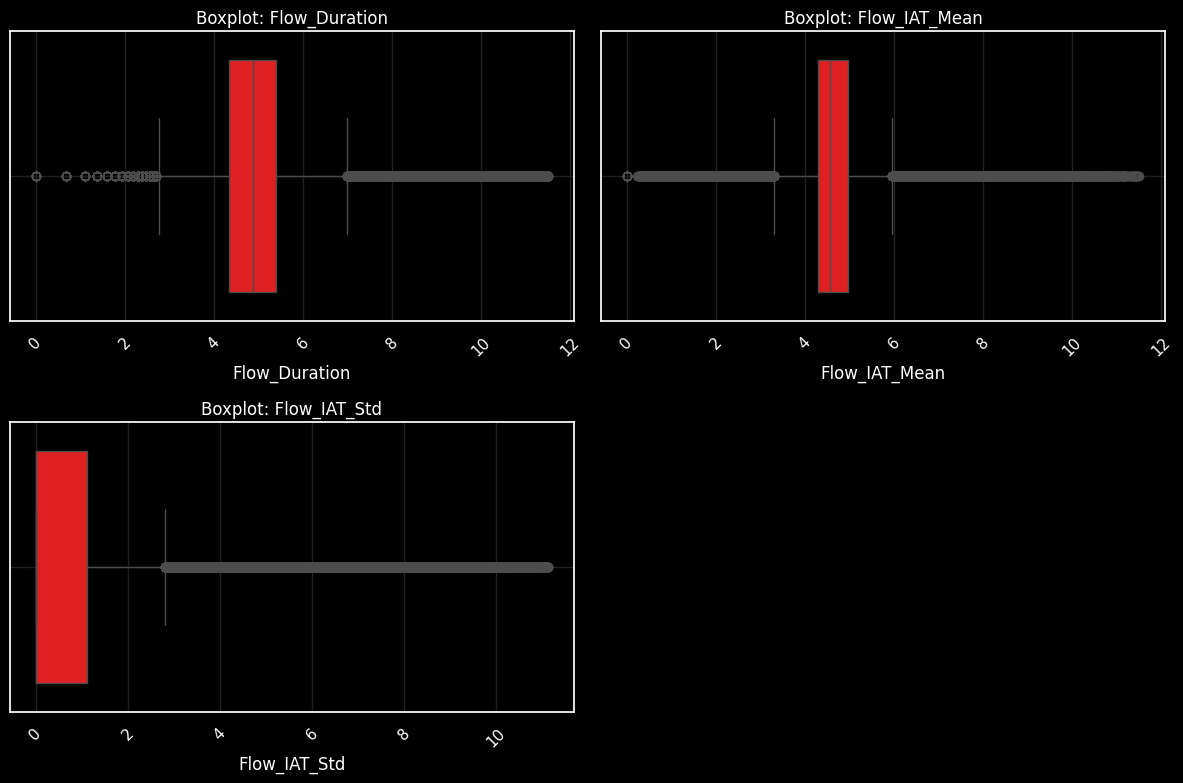

In [610]:
# Transmission regular features
col = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)

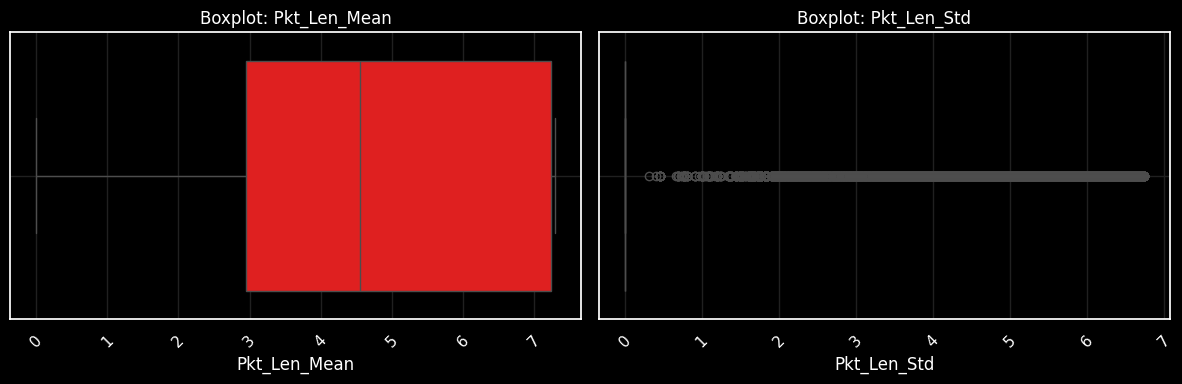

In [611]:
# Transmission packet sizes
col = ['Pkt_Len_Mean', 'Pkt_Len_Std']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)

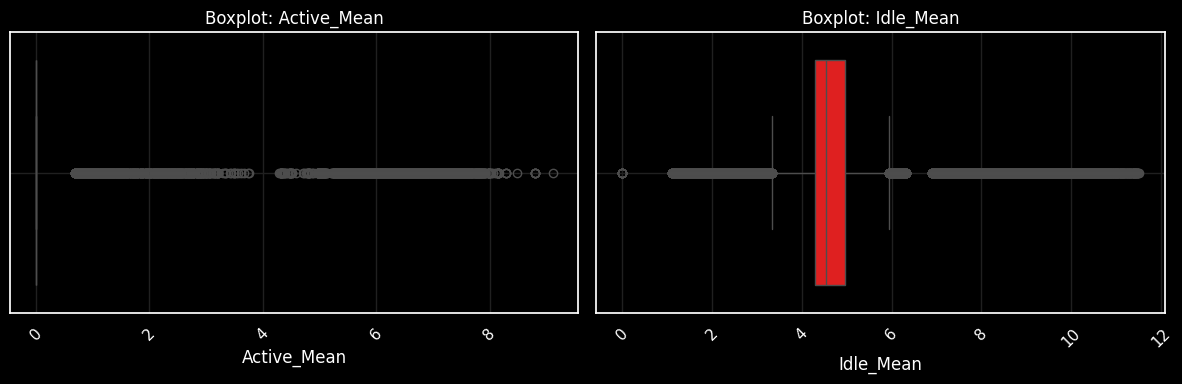

In [612]:
# activity
col = ['Active_Mean', 'Idle_Mean']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)

## Histograms with Labels

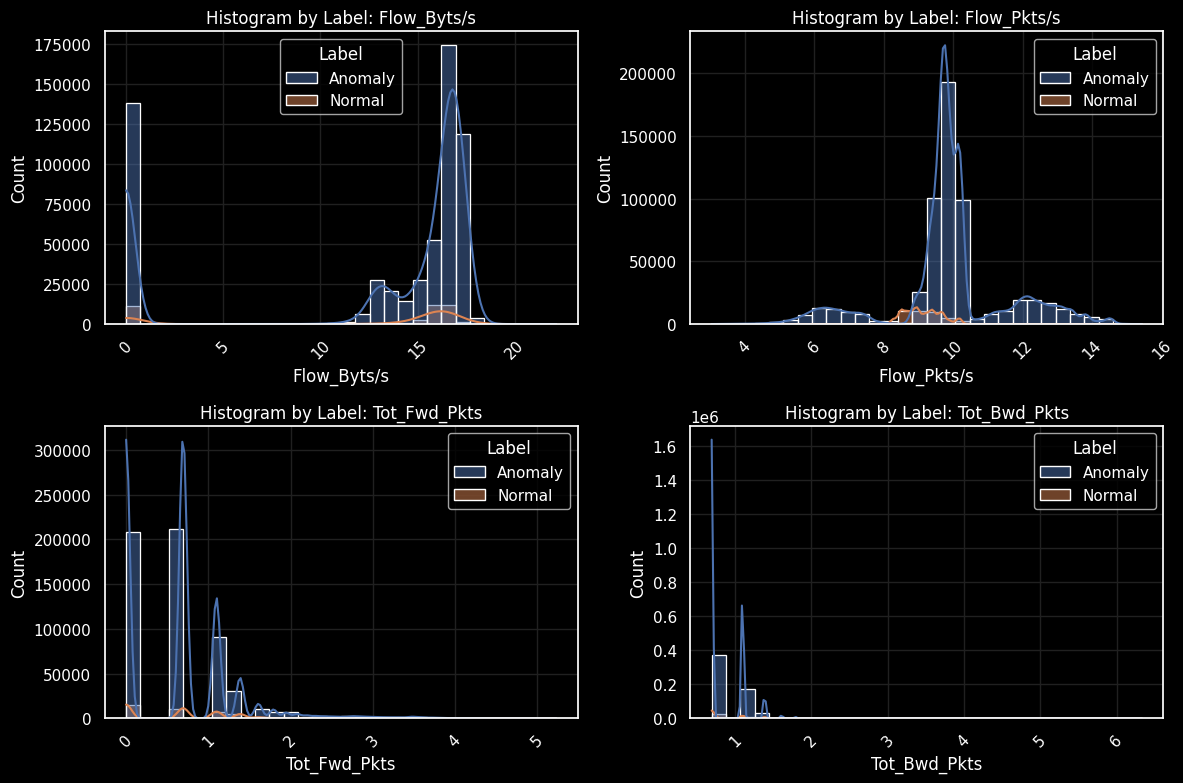

In [613]:
# Boxplots of log transformed features, for better visualization
col = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

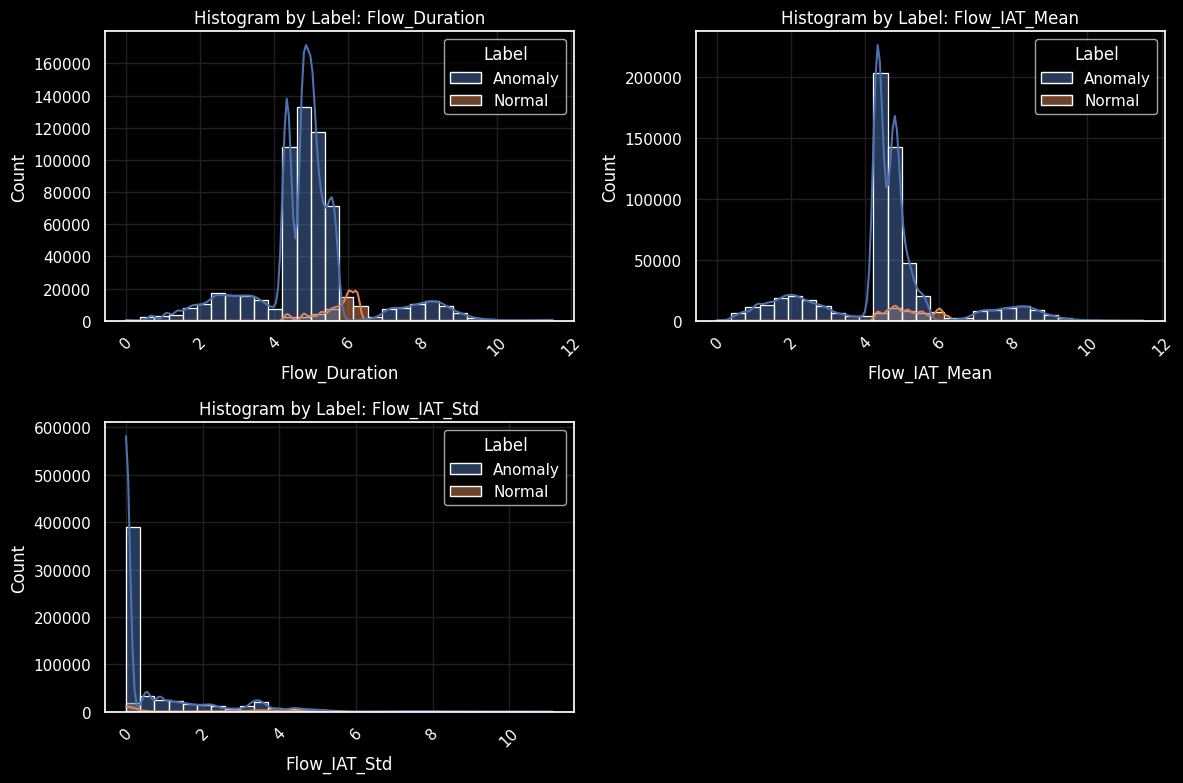

In [614]:
# Transmission regular features
col = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

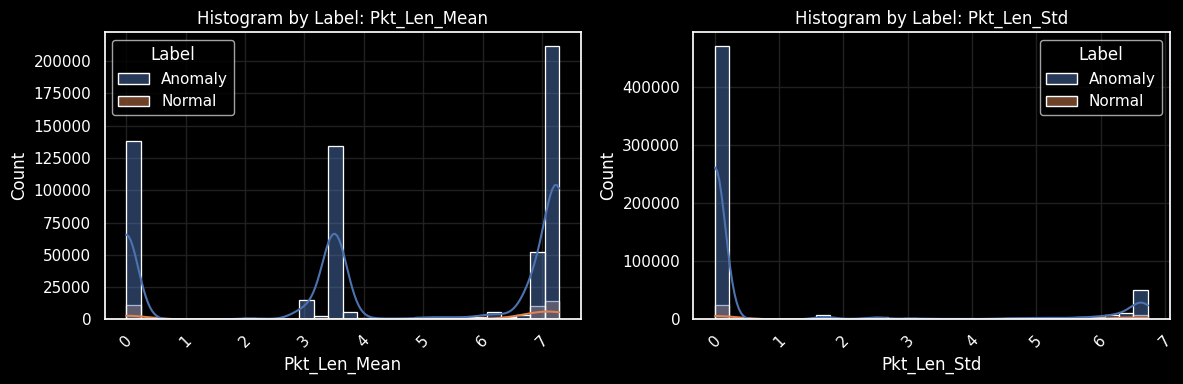

In [615]:
# Transmission packet sizes
col = ['Pkt_Len_Mean', 'Pkt_Len_Std']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

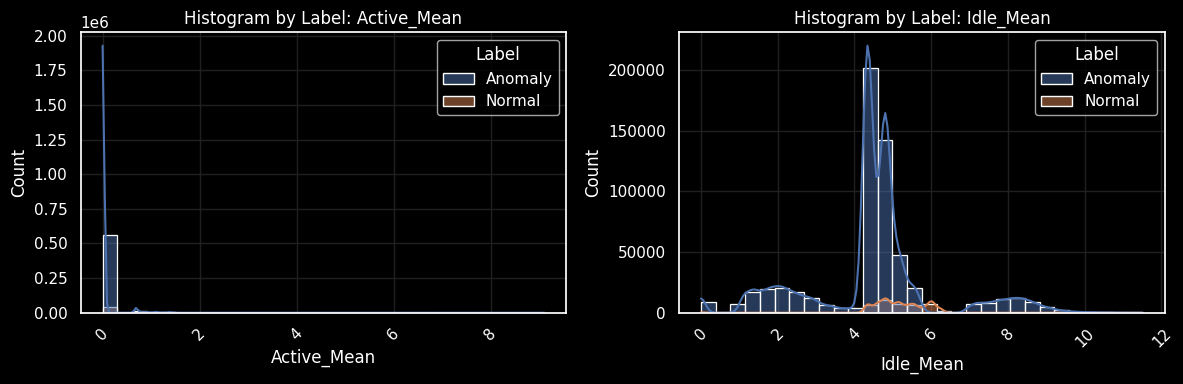

In [616]:
col = ['Active_Mean', 'Idle_Mean']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

# Korelacje
dodaje zlogarytmizowane zmienne, które ujawniają dzięki temu strukturę, nie zniekształcając przenoszonych informacji. Nie logarytmizuje zmiennych czasowych bo zniekształciłoby to przenoszone informacje tj różnica między czas 10 - 100 ms nie jest tożsama z różnicą 100 - 1000 ms.

In [617]:
def plot_corr_heatmap(corr_matrix):
    ''' Plot heatmap of the correlation matrix.'''
    plt.figure(figsize=(12, 10))
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020"
    })
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8}, square=True, linewidths=.5)
    plt.title("Correlation Heatmap", color='white')
    plt.show()

In [618]:
corr_features = [
    # does not exist yet
    'Flow_Pkts/s_log',
    'Flow_Byts/s_log',
    'Flow_Duration_log',
    'Tot_Fwd_Pkts_log',
    'Tot_Bwd_Pkts_log',

    'Flow_IAT_Mean',
    'Flow_IAT_Std',
    'Pkt_Len_Mean',
    'Pkt_Len_Std',
    'Active_Mean',
    'Idle_Mean'
]
df_corr = df[corr_features[5:]].copy()

columns_to_log = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'Flow_Duration']
for col in columns_to_log:
    df_corr[col + "_log"] = np.log1p(df[col])

# result
display(df_corr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_IAT_Mean      625783 non-null  float64
 1   Flow_IAT_Std       625783 non-null  float64
 2   Pkt_Len_Mean       625783 non-null  float64
 3   Pkt_Len_Std        625783 non-null  float64
 4   Active_Mean        625783 non-null  float64
 5   Idle_Mean          625783 non-null  float64
 6   Flow_Byts/s_log    625783 non-null  float64
 7   Flow_Pkts/s_log    625783 non-null  float64
 8   Tot_Fwd_Pkts_log   625783 non-null  float64
 9   Tot_Bwd_Pkts_log   625783 non-null  float64
 10  Flow_Duration_log  625783 non-null  float64
dtypes: float64(11)
memory usage: 52.5 MB


None

Spearman bo jest odporny na outliery i dobrze działa podobno na log transformach. Pearsona też sprawdze for fun
## Spearman


In [619]:
corr_spearman = df_corr.corr(method='spearman')

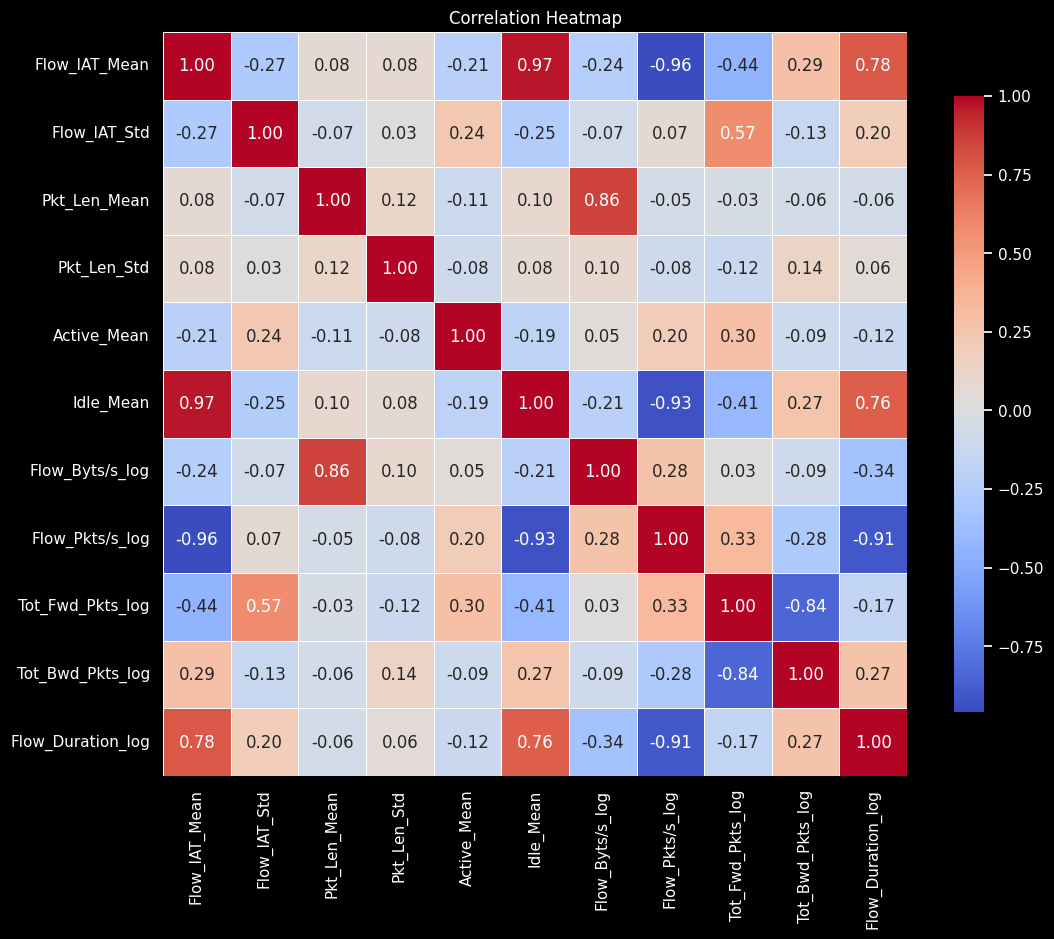

In [620]:
plot_corr_heatmap(corr_spearman)

interpretacja:
- Idle_Mean <-> Flow_IAT_Mean - duża korelacja co jest logiczne - im większe odstępy czasowe między kolejnymi pakietami - tym czas Idle. Jedno do wyrzucenia.
- Flow_Pkts/s_log <-> Flow_IAT_Mean - też logiczne - im wieksza liczba pakietów na sekundę tym mniejszy czas Idle urządzenia.
- Flow_Duration <-> Flow_IAT_Mean - skorelowane, ale mam wątpliwości co do tego czy w rzeczywistości te dwie wartości są od siebie zależne!
- Pkt_Len_Mean <-> Flow_Bytes/s_log - liczba bajtów w flow będzie między innymi zależna od rozmiaru pakietu - możliwe że Flow Bytes do wyrzucenia ale w sumie mierzą osobno przepływ liczba to jeszcze nie wiem??
- Flow_Bytes/s_log <-> Idle_Mean - im rzadziej wysyła tym mniejszy przepływ
- Flow_Pkts/s_log <-> Flow_Duration_log - silna korelacja, ale fizycznie to nie jest powiązane!!! nie moge raczej tego wyrzucić, chyba że do modelu liniowego...
- Tot_Fwd_Pkts_log <-> Tot_Bwd_Pkts_log - niby skorelowane ale różnica niesie cenną informację - lepiej zastąpić: fwd_pkts - bwd_pkts

* Flow_IAT_Mean - wyrzucić
* Tot_Fwd_Pkts_log i Tot_Bwd_Pkts_log zastąpić: różnicą fwd_pkts - bwd_pkts

## in result of correl

In [621]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_IAT_Mean      625783 non-null  float64
 1   Flow_IAT_Std       625783 non-null  float64
 2   Pkt_Len_Mean       625783 non-null  float64
 3   Pkt_Len_Std        625783 non-null  float64
 4   Active_Mean        625783 non-null  float64
 5   Idle_Mean          625783 non-null  float64
 6   Flow_Byts/s_log    625783 non-null  float64
 7   Flow_Pkts/s_log    625783 non-null  float64
 8   Tot_Fwd_Pkts_log   625783 non-null  float64
 9   Tot_Bwd_Pkts_log   625783 non-null  float64
 10  Flow_Duration_log  625783 non-null  float64
dtypes: float64(11)
memory usage: 52.5 MB


In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 68 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Protocol           625783 non-null  int64  
 1   Flow_Duration      625783 non-null  int64  
 2   Tot_Fwd_Pkts       625783 non-null  int64  
 3   Tot_Bwd_Pkts       625783 non-null  int64  
 4   TotLen_Fwd_Pkts    625783 non-null  float64
 5   TotLen_Bwd_Pkts    625783 non-null  float64
 6   Fwd_Pkt_Len_Max    625783 non-null  float64
 7   Fwd_Pkt_Len_Min    625783 non-null  float64
 8   Fwd_Pkt_Len_Mean   625783 non-null  float64
 9   Fwd_Pkt_Len_Std    625783 non-null  float64
 10  Bwd_Pkt_Len_Max    625783 non-null  float64
 11  Bwd_Pkt_Len_Min    625783 non-null  float64
 12  Bwd_Pkt_Len_Mean   625783 non-null  float64
 13  Bwd_Pkt_Len_Std    625783 non-null  float64
 14  Flow_Byts/s        625783 non-null  float64
 15  Flow_Pkts/s        625783 non-null  float64
 16  Fl

In [623]:
corr_pearson = df_corr.corr(method='pearson')

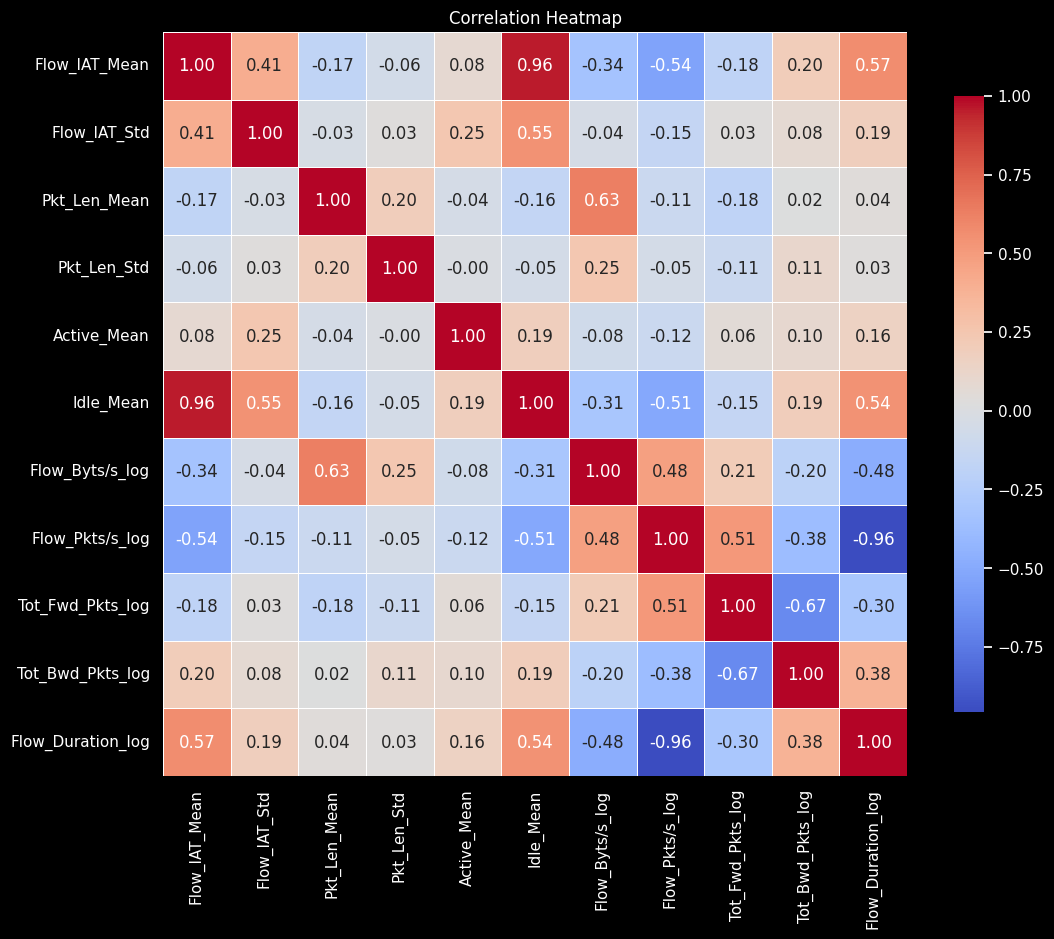

In [624]:
plot_corr_heatmap(corr_pearson)

In [625]:
df['Intensity_Duration_Ratio'] = df_corr['Flow_Pkts/s_log'] / (df_corr['Flow_Duration_log'] + 1e-8) #in case of zero duration
df['Fwd_Bwd_Asymetry'] = (df_corr['Tot_Fwd_Pkts_log'] - df_corr['Tot_Bwd_Pkts_log'])

# Dropuje Idle Mean and Active_Mean as they are highly correlated with another feature and active mean can be described by other features
# df.drop(columns=['Idle_Mean', 'Active_Mean'], inplace=True)

potwiedza silną zależ liniową miedzy Flow_Duration_Log a Flow_Pkt/s_Log, ale wnoszą różne infomacje. Dla drzew ok, w regresji liniowej do wyrzucenia. Idle_Mean do wyrzucenia silna zależność liniowa z Flow_IAT_Mean


## Zmienna celu

In [626]:
df["Label"].value_counts(normalize=True)

Label
Anomaly    0.935963
Normal     0.064037
Name: proportion, dtype: float64

<Axes: title={'center': 'Class Distribution of Target Variable'}, xlabel='Label'>

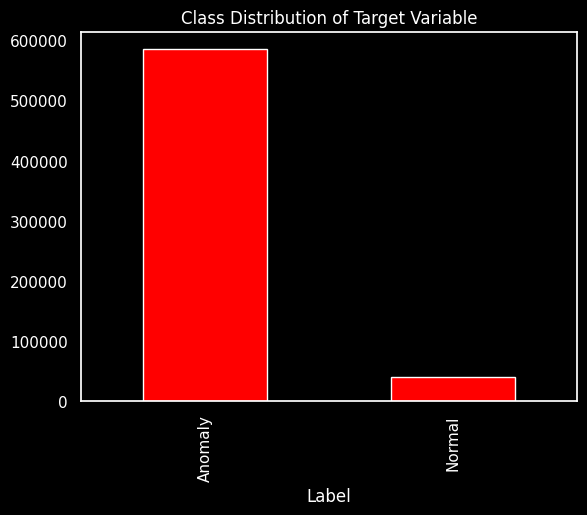

In [627]:
# wykres label
df["Label"].value_counts().plot(kind='bar', color='red', title='Class Distribution of Target Variable')

# Modelowanie
Z racji na silny imbalance zmiennej celu, tj ok 93 : 7 dla Anomaly, metryka accuracy zostanie pominięta. Skupimy się na recall, precision, F1 i confusion matrix.

1. BASE MODEL - Logistic regression.

In [628]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# models
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    balanced_accuracy_score,
)
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay


In [629]:
# # Kodowanie etykiet: Normal = 0, Attack = 1
# df['Label_bin']= df['Label'].apply(lambda x: 0 if x=='Normal' else 1)
# display(df[["Label", "Label_bin"]].head(10))
# display(df['Label_bin'].dtype)

In [630]:
# # Brak par z Pearson = 1 / - 1
# # Dlaczego wybrałem takie cechy? Na początku chce spróbować z mocno ograniczonym zbiorem cech bazowych, które mają sens w kontekście analizy ruchu sieciowego IoT. Spróbujemy na początku
# # ze zmiennymi logarytmicznymi dotyczącymi intensywności transmisji (Flow_Pkts/s_log, Flow_Byts/s_log), średnim czasem między pakietami (Flow_IAT_Mean),
# # średnią długością pakietów (Pkt_Len_Mean), odchyleniem standardowym długości pakietów (Pkt_Len_Std),
# # asymetrią między pakietami w kierunku do przodu i do tyłu (Fwd_Bwd_Asymetry) oraz stosunkiem intensywności do czasu trwania transmisji (Intensity_Duration_Ratio).

# features_baseline = [
#     'Flow_Pkts/s_log',
#     'Flow_Byts/s_log',
#     'Flow_IAT_Mean',
#     'Pkt_Len_Mean',
#     'Pkt_Len_Std',
#     'Fwd_Bwd_Asymetry',
#     'Intensity_Duration_Ratio',
# ]


In [631]:
# df_baseline = df_corr[['Flow_Pkts/s_log', 'Flow_Byts/s_log']].copy()

In [632]:
# for col in features_baseline[2:]:
#     df_baseline[col] = df[col]

In [633]:
# df_baseline.info()

In [634]:
# Split into test and train sets


# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# model = LogisticRegression(class_weight='balanced',random_state=42, max_iter=1000)
# model.fit(X_train_scaled, y_train)


In [635]:
def Pipeline_proceed(X, model):
    # divide into numeric and categorical features
    num_features = X.select_dtypes(include=['number']).columns
    cat_features = X.select_dtypes(include=['object', 'category']).columns

    # numerical pipeline
    num_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    # categorical pipeline
    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("num", num_pipe, num_features),
        ("cat", cat_pipe, cat_features)
    ])

    # combine pipelines
    pipe = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    return pipe

In [636]:
# def calculate_metrics(y_test, y_proba, y_pred):
#     metrics = {
#         "accuracy": accuracy_score(y_test, y_pred),
#         "precision": precision_score(y_test, y_pred),
#         "recall": recall_score(y_test, y_pred),
#         "f1_score": f1_score(y_test, y_pred),
#         "roc_auc": roc_auc_score(y_test, y_proba),
#         "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred)
#     }
#     metrics_df = pd.DataFrame([metrics])
#     return metrics_df

In [637]:
def train_and_evaluate(X_train, X_test, y_train, y_test, model):
    # build pipeline
    pipe = Pipeline_proceed(X_train, model)

    # train the model
    pipe.fit(X_train, y_train)

    # make predictions
    y_pred = pipe.predict(X_test)
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)        # not every model has predict_proba method
        results = {
            "y_test": y_test,
            "y_pred": y_pred,
            "y_proba": y_proba
        }
    else:
        results = {
            "y_test": y_test,
            "y_pred": y_pred,
        }
        roc_auc = None

    # evaluate the model
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc,
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred)
    }


    conf_matrix = confusion_matrix(y_test, y_pred)
    metrics_df = pd.DataFrame([metrics])
    results_df = pd.DataFrame(results)
    return metrics_df, conf_matrix, results_df, pipe

In [638]:
def plot_conf_matrix(cm):
    ''' Plot confusion matrix.'''

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12, 5))
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020"
    })
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Reds', cbar=False, xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix', color='white')
    plt.show()

In [639]:
def conf_matrix_extra_metrics(cm):
    ''' Calculate additional metrics from confusion matrix.'''
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    metrics = {
        "specificity": specificity,
        "npv": npv,
        "fpr": fpr,
        "fnr": fnr
    }
    return metrics

### 1. Logistic Regression

In [640]:
df['Label_bin']= df['Label'].apply(lambda x: 0 if x=='Normal' else 1)
display(df[["Label", "Label_bin"]].head(10))
display(df['Label_bin'].dtype)

,Label,Label_bin
0,Anomaly,1
1,Anomaly,1
2,Anomaly,1
3,Anomaly,1
4,Anomaly,1
5,Anomaly,1
6,Anomaly,1
7,Anomaly,1
8,Anomaly,1
9,Anomaly,1


dtype('int64')

In [641]:
# Brak par z Pearson = 1 / - 1
# Dlaczego wybrałem takie cechy? Na początku chce spróbować z mocno ograniczonym zbiorem cech bazowych, które mają sens w kontekście analizy ruchu sieciowego IoT. Spróbujemy na początku
# ze zmiennymi logarytmicznymi dotyczącymi intensywności transmisji (Flow_Pkts/s_log, Flow_Byts/s_log), średnim czasem między pakietami (Flow_IAT_Mean),
# średnią długością pakietów (Pkt_Len_Mean), odchyleniem standardowym długości pakietów (Pkt_Len_Std),
# asymetrią między pakietami w kierunku do przodu i do tyłu (Fwd_Bwd_Asymetry) oraz stosunkiem intensywności do czasu trwania transmisji (Intensity_Duration_Ratio).

features_baseline = [
    'Flow_Pkts/s',
    'Flow_Byts/s',
    'Flow_IAT_Mean',
    'Pkt_Len_Mean',
    'Pkt_Len_Std',
    'Fwd_Bwd_Asymetry',
    'Intensity_Duration_Ratio',
]

In [642]:
df_baseline = pd.DataFrame()
for col in features_baseline:
    df_baseline[col] = df[col]

In [643]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Flow_Pkts/s               625783 non-null  float64
 1   Flow_Byts/s               625783 non-null  float64
 2   Flow_IAT_Mean             625783 non-null  float64
 3   Pkt_Len_Mean              625783 non-null  float64
 4   Pkt_Len_Std               625783 non-null  float64
 5   Fwd_Bwd_Asymetry          625783 non-null  float64
 6   Intensity_Duration_Ratio  625783 non-null  float64
dtypes: float64(7)
memory usage: 33.4 MB


In [644]:
lr_model = LogisticRegression(class_weight='balanced',
                              random_state=42, 
                              max_iter=1000)

In [645]:
metrics, conf_matrix, res, pipe = train_and_evaluate(X_train, X_test, y_train, y_test, lr_model)
metrics.index = ['Logistic Regression with logs']
results = metrics
display(results)
display(conf_matrix)

,accuracy,precision,recall,f1_score,roc_auc,balanced_accuracy_score
Logistic Regression with logs,0.803543,0.987732,0.800038,0.884032,0.91776,0.827405


array([[ 6851,  1164],
       [23424, 93718]])

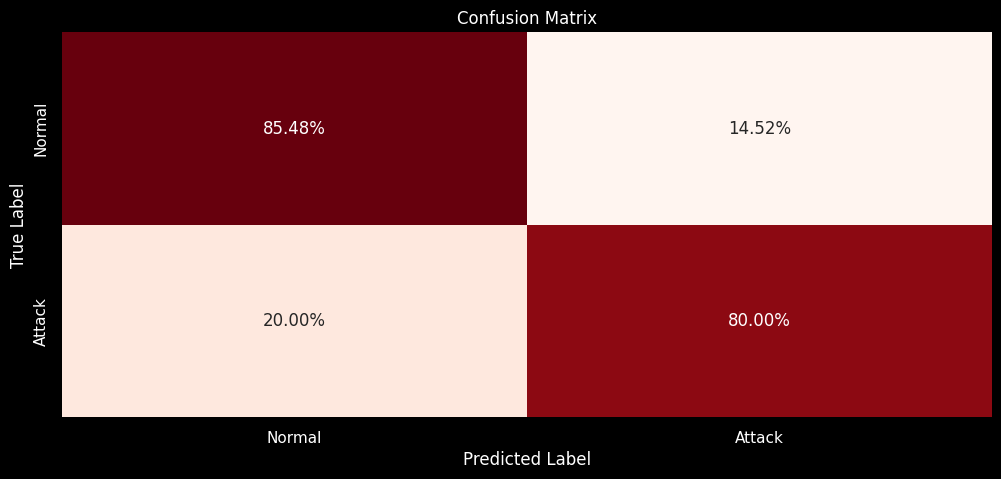

In [646]:
plot_conf_matrix(conf_matrix)

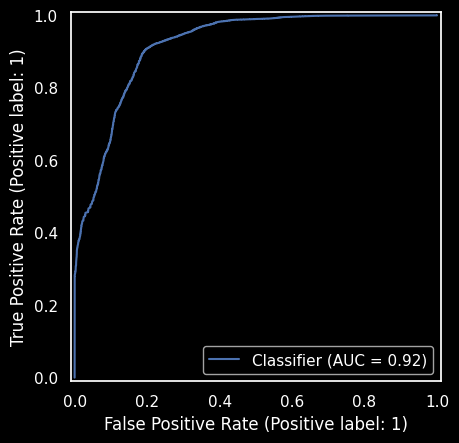

In [647]:
RocCurveDisplay.from_predictions(res["y_test"], res["y_proba"])         # ROC Curve

,feature,coefficient,abs_coef
2,Flow_IAT_Mean,26.362259,26.362259
0,Flow_Pkts/s_log,9.000027,9.000027
1,Flow_Byts/s_log,1.355741,1.355741
3,Pkt_Len_Mean,-0.895138,0.895138
4,Pkt_Len_Std,-0.617367,0.617367
6,Intensity_Duration_Ratio,0.218531,0.218531
5,Fwd_Bwd_Asymetry,0.050171,0.050171


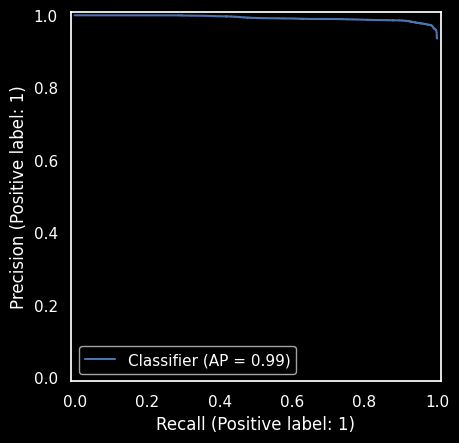

In [648]:
PrecisionRecallDisplay.from_predictions(res["y_test"], res["y_proba"])  # Precision Curve
# wyciągamy model
log_reg = pipe.named_steps['model']

# wyciągamy nazwy cech numerycznych (po scalerze)
feature_names = pipe.named_steps['preprocessing'] \
    .named_transformers_['num'] \
    .get_feature_names_out()

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': log_reg.coef_[0]
})

coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

coef_df

### 2. Logistic Regression with logarytmic data

In [649]:
# Kodowanie etykiet: Normal = 0, Attack = 1
df['Label_bin']= df['Label'].apply(lambda x: 0 if x=='Normal' else 1)
display(df[["Label", "Label_bin"]].head(10))
display(df['Label_bin'].dtype)

,Label,Label_bin
0,Anomaly,1
1,Anomaly,1
2,Anomaly,1
3,Anomaly,1
4,Anomaly,1
5,Anomaly,1
6,Anomaly,1
7,Anomaly,1
8,Anomaly,1
9,Anomaly,1


dtype('int64')

In [650]:
# Brak par z Pearson = 1 / - 1
# Dlaczego wybrałem takie cechy? Na początku chce spróbować z mocno ograniczonym zbiorem cech bazowych, które mają sens w kontekście analizy ruchu sieciowego IoT. Spróbujemy na początku
# ze zmiennymi logarytmicznymi dotyczącymi intensywności transmisji (Flow_Pkts/s_log, Flow_Byts/s_log), średnim czasem między pakietami (Flow_IAT_Mean),
# średnią długością pakietów (Pkt_Len_Mean), odchyleniem standardowym długości pakietów (Pkt_Len_Std),
# asymetrią między pakietami w kierunku do przodu i do tyłu (Fwd_Bwd_Asymetry) oraz stosunkiem intensywności do czasu trwania transmisji (Intensity_Duration_Ratio).

features_baseline = [
    'Flow_Pkts/s_log',
    'Flow_Byts/s_log',
    'Flow_IAT_Mean',
    'Pkt_Len_Mean',
    'Pkt_Len_Std',
    'Fwd_Bwd_Asymetry',
    'Intensity_Duration_Ratio',
]

In [651]:
df_baseline = df_corr[['Flow_Pkts/s_log', 'Flow_Byts/s_log']].copy()

In [652]:
for col in features_baseline[2:]:
    df_baseline[col] = df[col]

In [653]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Flow_Pkts/s_log           625783 non-null  float64
 1   Flow_Byts/s_log           625783 non-null  float64
 2   Flow_IAT_Mean             625783 non-null  float64
 3   Pkt_Len_Mean              625783 non-null  float64
 4   Pkt_Len_Std               625783 non-null  float64
 5   Fwd_Bwd_Asymetry          625783 non-null  float64
 6   Intensity_Duration_Ratio  625783 non-null  float64
dtypes: float64(7)
memory usage: 33.4 MB


In [654]:
X = df_baseline
y = df['Label_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify musi być bo target jest irregular!!!!

In [656]:
lr_model = LogisticRegression(class_weight='balanced',
                              random_state=42, 
                              max_iter=1000)

In [657]:
metrics, conf_matrix, res, pipe = train_and_evaluate(X_train, X_test, y_train, y_test, lr_model)
metrics.index = ['Logistic Regression with logs']
results = metrics
display(results)
display(conf_matrix)

,accuracy,precision,recall,f1_score,roc_auc,balanced_accuracy_score
Logistic Regression with logs,0.803543,0.987732,0.800038,0.884032,0.91776,0.827405


array([[ 6851,  1164],
       [23424, 93718]])

* accuracy - ignoruję tę metrykę. Przy imbalance ona nic nie mówi.
* precision - wysoki jak na base model, ale też nie za dużo mówi. Mógł w większości przypadków stwierdzić że rekord to anomalia i statystycznie na 100 przypadków 93 trafił.
* recall - Jest miejsce do poprawy - trafił 80% przypadków Anomalii - stosunkowo ok jak na baseline, pole do poprawy
* f1_score - Myśle że to też spróbujemy jeszcze poprawić (recal <--> precision)
* roc_auc - duża zdolność to rozróżniania (dużo ponad progiem 0.5)!!!! jest super :D
* confusion matrix
	            Pred Normal	    Pred Anomaly
True Normal	    6851	        1164
True Anomaly	23424	        93718

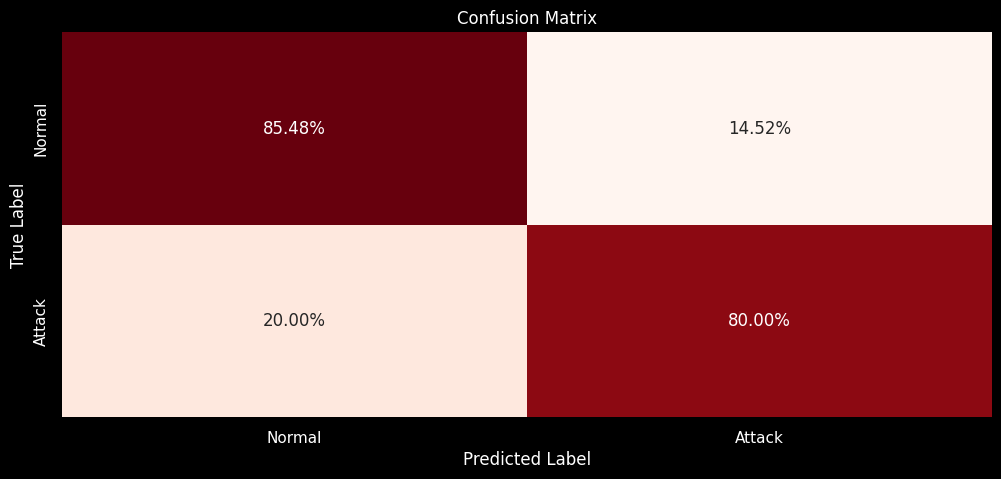

In [658]:
plot_conf_matrix(conf_matrix)

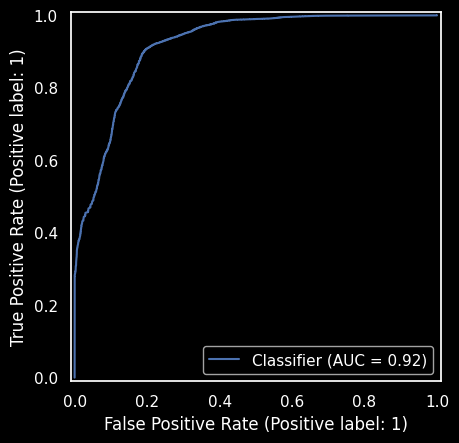

In [659]:


RocCurveDisplay.from_predictions(res["y_test"], res["y_proba"])         # ROC Curve


jeśli linia jest jak funkcja liniowa to wynik regresji jest losowy. W tym przypadku widać że realnie model dokonuje decyzji. Y - prawd. wykrycia klasy pozytywnej (Anomalia), X - prawdopodobieństwo klasyfikacji klasy negatywnej jako pozytywnej - RECALL / TPR

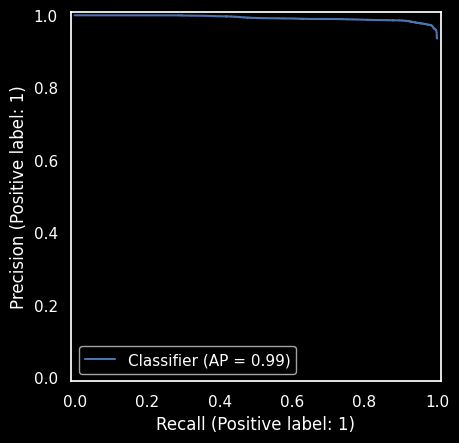

In [660]:
PrecisionRecallDisplay.from_predictions(res["y_test"], res["y_proba"])  # Precision Curve

In [661]:
# wyciągamy model
log_reg = pipe.named_steps['model']

# wyciągamy nazwy cech numerycznych (po scalerze)
feature_names = pipe.named_steps['preprocessing'] \
    .named_transformers_['num'] \
    .get_feature_names_out()

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': log_reg.coef_[0]
})

coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

coef_df

,feature,coefficient,abs_coef
2,Flow_IAT_Mean,26.362259,26.362259
0,Flow_Pkts/s_log,9.000027,9.000027
1,Flow_Byts/s_log,1.355741,1.355741
3,Pkt_Len_Mean,-0.895138,0.895138
4,Pkt_Len_Std,-0.617367,0.617367
6,Intensity_Duration_Ratio,0.218531,0.218531
5,Fwd_Bwd_Asymetry,0.050171,0.050171


In [662]:
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
coef_df

,feature,coefficient,abs_coef,odds_ratio
2,Flow_IAT_Mean,26.362259,26.362259,2.811795e+11
0,Flow_Pkts/s_log,9.000027,9.000027,8.103301e+03
1,Flow_Byts/s_log,1.355741,1.355741,3.879636e+00
3,Pkt_Len_Mean,-0.895138,0.895138,4.085512e-01
4,Pkt_Len_Std,-0.617367,0.617367,5.393629e-01
6,Intensity_Duration_Ratio,0.218531,0.218531,1.244247e+00
5,Fwd_Bwd_Asymetry,0.050171,0.050171,1.051451e+00


Najsilniejszy wpływ na model posiadała zmienna Flow_IAT_Mean, najmniejsza Fwd_bwd_Asymetry - do rozważenia czy nie mozna pomicąć?

In [663]:
# import numpy as np

# X_test_df = X_test.copy()
# X_test_df['y_true'] = res["y_test"].values
# X_test_df['y_pred'] = res["y_pred"]

# false_negatives = X_test_df[
#     (X_test_df['y_true'] == 1) &
#     (X_test_df['y_pred'] == 0)
# ]

# true_positives = X_test_df[
#     (X_test_df['y_true'] == 1) &
#     (X_test_df['y_pred'] == 1)
# ]

In [664]:
# comparison = pd.DataFrame({
#     'FN_mean': false_negatives[features_baseline].mean(),
#     'TP_mean': true_positives[features_baseline].mean()
# })

# comparison['difference'] = comparison['TP_mean'] - comparison['FN_mean']
# comparison.sort_values(by='difference', ascending=False)

odds_ratio = 2.5
→ wzrost cechy o 1 std = 2.5× większa szansa Anomaly

In [665]:
# coef = pipe.named_steps['model'].coef_[0]
# feature_names = pipe.named_steps['preprocessing'] \
#     .named_transformers_['num'] \
#     .named_steps['scaler'] \
#     .get_feature_names_out()
# display(feature_names)
# coef_df = pd.DataFrame({
#     'feature': feature_names,
#     'coefficient': coef
# }).sort_values(by='coefficient', ascending=False)
# display(coef_df)

idelne jak jest punkt 1,1. Oś Y (Precision): Jaka część przewidywań pozytywnych była trafna? Oś X (Recall): Ile ze wszystkich pozytywnych przypadków udało się wykryć?

In [666]:
conf_metric = conf_matrix_extra_metrics(conf_matrix)
display(conf_metric)

{'specificity': np.float64(0.854772301933874),
 'npv': np.float64(0.22629232039636665),
 'fpr': np.float64(0.145227698066126),
 'fnr': np.float64(0.19996243874955183)}

In [667]:
93718 / (93718 + 23424)

0.8000375612504482

### 1.1 Model Tunning

In [668]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)

results_tr = []

for t in thresholds:
    y_pred_t = (res["y_proba"] >= t).astype(int)
    results_tr.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t),
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_t)
    })

threshold_df = pd.DataFrame(results_tr)
threshold_df

,threshold,precision,recall,f1,balanced_accuracy_score
0,0.10,0.962249,0.994400,0.978060,0.712110
1,0.15,0.967390,0.989167,0.978157,0.750915
2,0.20,0.973495,0.979512,0.976494,0.794871
3,0.25,0.976639,0.963958,0.970257,0.813483
4,0.30,0.978879,0.947944,0.963163,0.824502
5,0.35,0.982068,0.929914,0.955280,0.840877
6,0.40,0.985250,0.907813,0.944948,0.854593
7,0.45,0.986408,0.856192,0.916699,0.841882
8,0.50,0.987732,0.800038,0.884032,0.827405
9,0.55,0.988568,0.763321,0.861465,0.817157


kompromis miedzy precision a recall:

In [669]:
threshold_df.loc[threshold_df['balanced_accuracy_score'].idxmax()]

threshold                  0.400000
precision                  0.985250
recall                     0.907813
f1                         0.944948
balanced_accuracy_score    0.854593
Name: 6, dtype: float64

In [670]:
# best_t = threshold_df.loc[threshold_df['balanced_accuracy_score'].idxmax(), 'threshold']

# y_pred_best = (res['y_proba'] >= best_t).astype(int)

# confusion_matrix(y_test, y_pred_best)
# classification_report(y_test, y_pred_best, digits=3)

In [671]:
display(results)

,accuracy,precision,recall,f1_score,roc_auc,balanced_accuracy_score
Logistic Regression with logs,0.803543,0.987732,0.800038,0.884032,0.91776,0.827405


In [672]:
best_t = threshold_df.loc[threshold_df['balanced_accuracy_score'].idxmax(), 'threshold']

y_pred_best = (res["y_proba"] >= best_t).astype(int)
conf_matrix_best = confusion_matrix(res['y_test'], y_pred_best)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(res['y_test'], y_pred_best),
        "precision": precision_score(res['y_test'], y_pred_best),
        "recall": recall_score(res['y_test'], y_pred_best),
        "f1_score": f1_score(res['y_test'], y_pred_best),
        "balanced_accuracy_score": balanced_accuracy_score(res['y_test'], y_pred_best)
    } 
metric_pd = pd.DataFrame([metrics])
display(metric_pd)

array([[  6423,   1592],
       [ 10799, 106343]])

,accuracy,precision,recall,f1_score,balanced_accuracy_score
0,0.900996,0.98525,0.907813,0.944948,0.854593


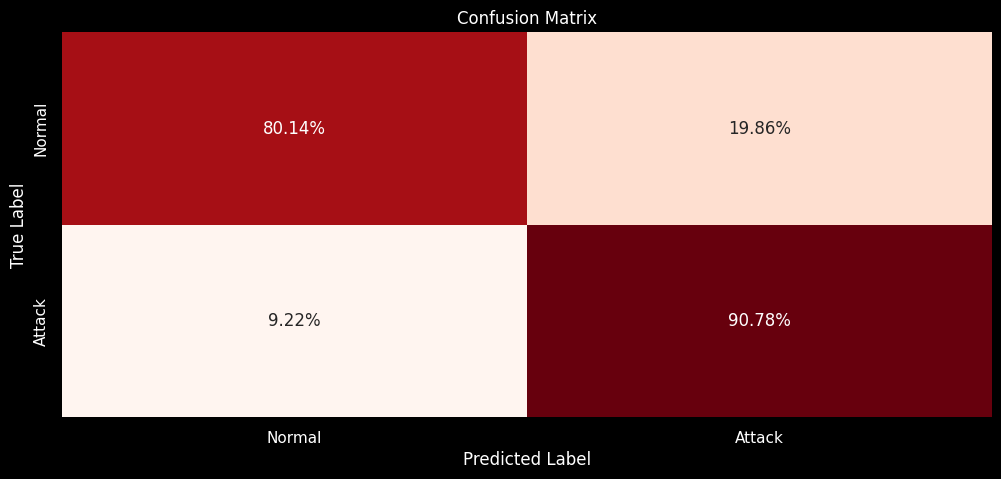

In [673]:
plot_conf_matrix(conf_matrix_best)

In [674]:
best_t = 0.3

y_pred_best = (res["y_proba"] >= best_t).astype(int)
conf_matrix_best = confusion_matrix(res['y_test'], y_pred_best)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(res['y_test'], y_pred_best),
        "precision": precision_score(res['y_test'], y_pred_best),
        "recall": recall_score(res['y_test'], y_pred_best),
        "f1_score": f1_score(res['y_test'], y_pred_best),
        "balanced_accuracy_score": balanced_accuracy_score(res['y_test'], y_pred_best)
    } 
metric_pd = pd.DataFrame([metrics])
display(metric_pd)

array([[  5619,   2396],
       [  6098, 111044]])

,accuracy,precision,recall,f1_score,balanced_accuracy_score
0,0.932133,0.978879,0.947944,0.963163,0.824502


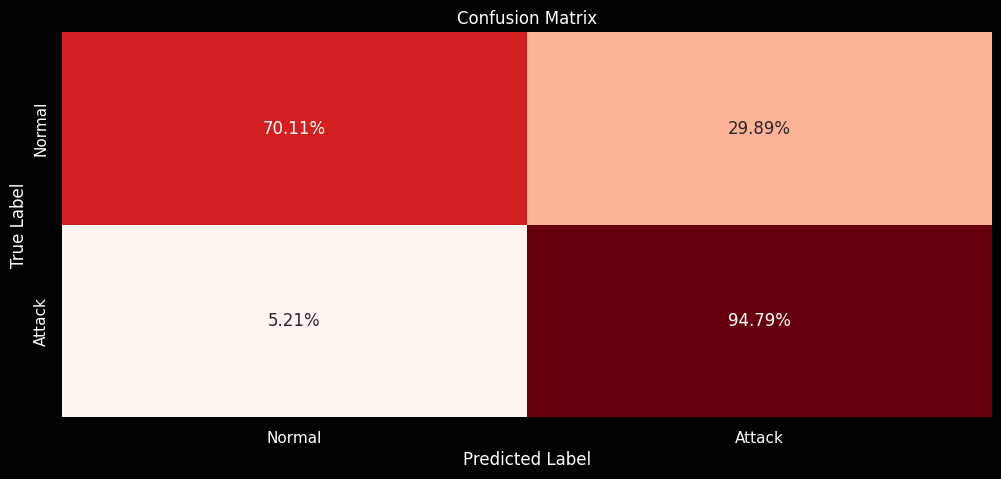

In [675]:
plot_conf_matrix(conf_matrix_best)

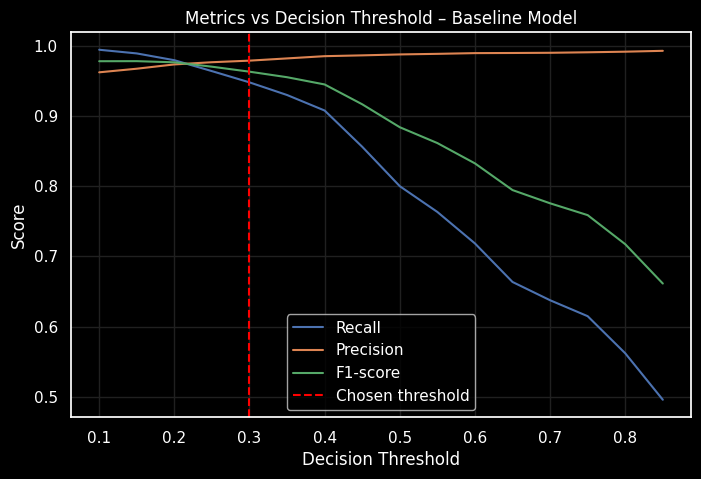

In [676]:
plt.figure(figsize=(8, 5))
plt.plot(threshold_df['threshold'], threshold_df['recall'], label='Recall')
plt.plot(threshold_df['threshold'], threshold_df['precision'], label='Precision')
plt.plot(threshold_df['threshold'], threshold_df['f1'], label='F1-score')

plt.axvline(x=0.30, linestyle='--', color='red', label='Chosen threshold')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()

## wnioski i co zostawiam? Po dłuższym namyśle ustawiam treshold 30. Dlaczego Mikołajek dlaczego? Bo priorytetem dla mnie jest wykrycie anomali. Zgłoszenie normalnego ruchu sieciowego jako atak nie jest kosztownym błędem natomiast niewykrycie ataku na sieć może skutkować poważniejszymi konsekwencjami. Nie biore też tresholdu dla max. recall - Zależy mi również żeby jak najmniej rekordów z ruchu normalnego zostało zakwalifikowanych jako atak. 95% wykrywalności na ten moment wydaje się akceptowalne, jednak zobaczymy jak poradzą sobie pozostałe modele.

Jako model bazowy zastosowano regresję logistyczną z wagami klas w celu uwzględnienia silnego niezbalansowania danych. Model osiągnął wysoką precyzję detekcji anomalii oraz ROC-AUC na poziomie około 0.92. Dzięki dostrojeniu progu decyzyjnego uzyskano istotny wzrost recall, co jest kluczowe w kontekście systemów detekcji intruzji. Model ten stanowi punkt odniesienia dla dalszych, bardziej złożonych metod.

# 2. Random Forest - challenger
dla eksperymentu se może walne jeszcze z logami?

Dodaję więcej zmiennych, mam nadzieje że się nie będzie jakoś długo liczyć.

In [677]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [678]:
features_rf = [
    'Flow_Pkts/s',
    'Flow_Byts/s',
    'Flow_Duration',
    'Tot_Fwd_Pkts',
    'Tot_Bwd_Pkts',

    'Flow_IAT_Mean',
    'Flow_IAT_Std',

    'Pkt_Len_Mean',
    'Pkt_Len_Std',

    'Active_Mean',
    'Idle_Mean',

    'Fwd_Bwd_Asymetry',
    'Intensity_Duration_Ratio'
]
df_rf = df[features_rf].copy()
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Flow_Pkts/s               625783 non-null  float64
 1   Flow_Byts/s               625783 non-null  float64
 2   Flow_Duration             625783 non-null  int64  
 3   Tot_Fwd_Pkts              625783 non-null  int64  
 4   Tot_Bwd_Pkts              625783 non-null  int64  
 5   Flow_IAT_Mean             625783 non-null  float64
 6   Flow_IAT_Std              625783 non-null  float64
 7   Pkt_Len_Mean              625783 non-null  float64
 8   Pkt_Len_Std               625783 non-null  float64
 9   Active_Mean               625783 non-null  float64
 10  Idle_Mean                 625783 non-null  float64
 11  Fwd_Bwd_Asymetry          625783 non-null  float64
 12  Intensity_Duration_Ratio  625783 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 62.1 

In [679]:
X = df_rf
y = df['Label_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify musi być bo target jest irregular!!!!

In [680]:

num_features = features_rf
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features)
    ]
)

In [681]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [682]:
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", rf_model)
])

In [683]:
rf_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse

In [684]:
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

In [690]:
conf_matrix_best = confusion_matrix(y_test, y_pred_rf)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(y_test, y_pred_rf),
        "precision": precision_score(y_test, y_pred_rf),
        "recall": recall_score(y_test, y_pred_rf),
        "roc_auc": roc_auc_score(y_test, y_proba_rf),
        "f1_score": f1_score(y_test, y_pred_rf),
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_rf)
    } 
metric_pd = pd.DataFrame([metrics])
display(metric_pd)

array([[  7452,    563],
       [  5072, 112070]])

,accuracy,precision,recall,roc_auc,f1_score,balanced_accuracy_score
0,0.954977,0.995001,0.956702,0.987427,0.975476,0.943229


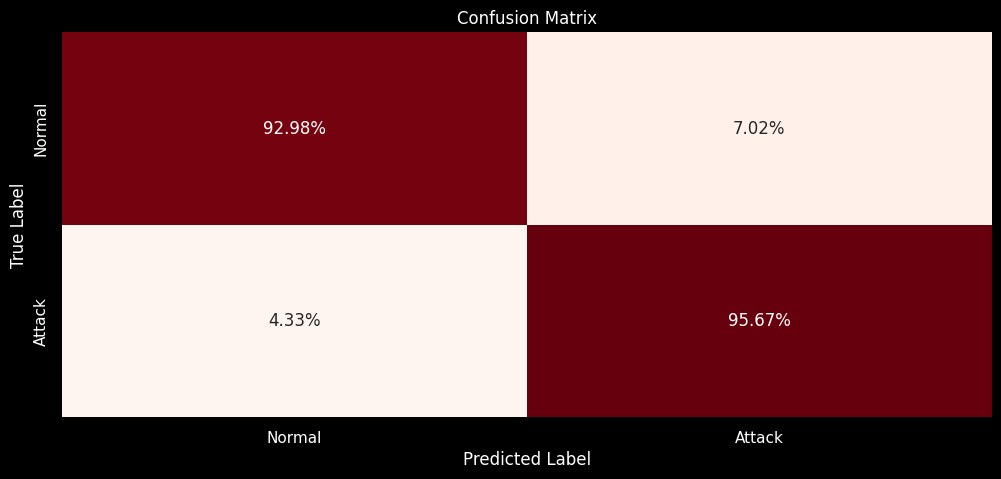

In [687]:
plot_conf_matrix(conf_matrix_best)

In [686]:
thresholds = np.arange(0.1, 0.9, 0.05)

results_rf = []

for t in thresholds:
    y_pred_t = (y_proba_rf >= t).astype(int)
    results_rf.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t),
        "balanced_acc": balanced_accuracy_score(y_test, y_pred_t)
    })

rf_threshold_df = pd.DataFrame(results_rf)
rf_threshold_df

,threshold,precision,recall,f1,balanced_acc
0,0.10,0.986998,0.998634,0.992782,0.903185
1,0.15,0.988172,0.997046,0.992589,0.911312
2,0.20,0.989053,0.994912,0.991974,0.916982
3,0.25,0.989986,0.990789,0.990387,0.922157
4,0.30,0.991624,0.983345,0.987467,0.930974
5,0.35,0.992648,0.976217,0.984364,0.935270
6,0.40,0.994157,0.965862,0.979805,0.941446
7,0.45,0.994484,0.961901,0.977921,0.941961
8,0.50,0.995001,0.956702,0.975476,0.943229
9,0.55,0.995450,0.952528,0.973516,0.944449


In [691]:
best_t = 0.1

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(y_test, y_pred_best),
        "precision": precision_score(y_test, y_pred_best),
        "recall": recall_score(y_test, y_pred_best),
        "f1_score": f1_score(y_test, y_pred_best),
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_best)
    } 
metric_pd = pd.DataFrame([metrics])
display(metric_pd)

array([[  6474,   1541],
       [   160, 116982]])

,accuracy,precision,recall,f1_score,balanced_accuracy_score
0,0.986409,0.986998,0.998634,0.992782,0.903185


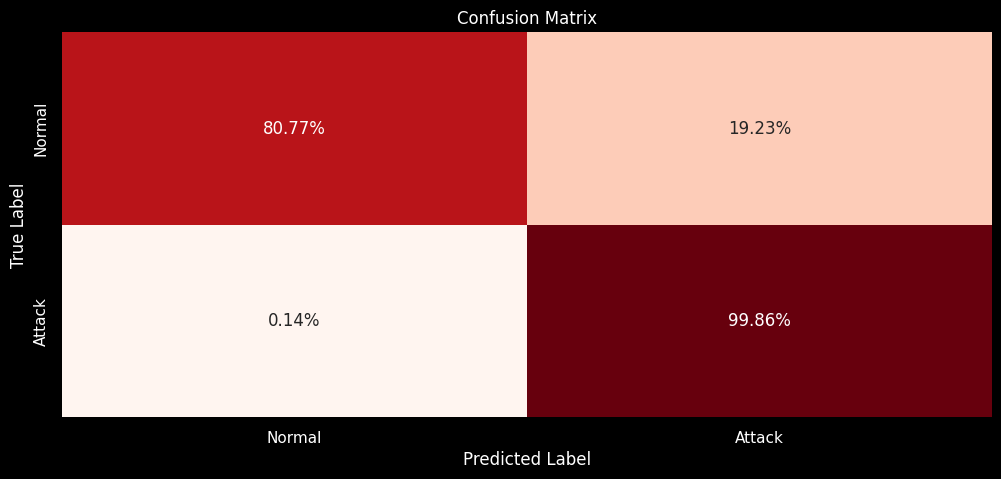

In [692]:
plot_conf_matrix(conf_matrix_best)

In [708]:
best_t = rf_threshold_df.loc[rf_threshold_df['balanced_acc'].idxmax(), 'threshold']

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(y_test, y_pred_best),
        "precision": precision_score(y_test, y_pred_best),
        "recall": recall_score(y_test, y_pred_best),
        "f1_score": f1_score(y_test, y_pred_best),
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_best)
    } 
metric_pd = pd.DataFrame([metrics])
display(metric_pd)

array([[  7549,    466],
       [  6023, 111119]])

,accuracy,precision,recall,f1_score,balanced_accuracy_score
0,0.948153,0.995824,0.948584,0.97163,0.945221


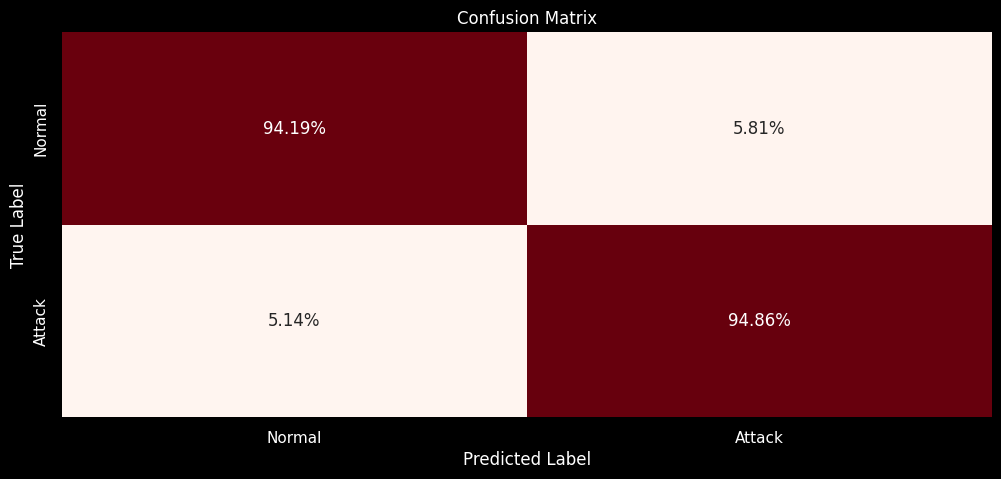

In [709]:
plot_conf_matrix(conf_matrix_best)

W tym przypadku biore treshold dla maksymalnej balanced accuracy score, co daje treshold = 0.6. W przypadku Recall faktycznie wykryto aż 99.86 % ataków lecz ok 20% normalnych ruchów zostało zaklasyfikowanych jako ataki.

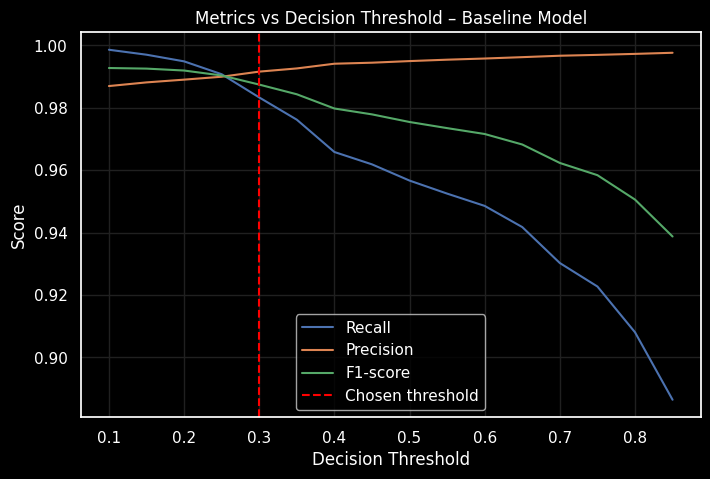

In [699]:
plt.figure(figsize=(8, 5))
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['recall'], label='Recall')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['precision'], label='Precision')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['f1'], label='F1-score')

plt.axvline(x=0.30, linestyle='--', color='red', label='Chosen threshold')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()

In [688]:
importances = rf_pipeline.named_steps['model'].feature_importances_

importance_df = pd.DataFrame({
    'feature': features_rf,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df

,feature,importance
2,Flow_Duration,0.198484
12,Intensity_Duration_Ratio,0.174036
7,Pkt_Len_Mean,0.141782
0,Flow_Pkts/s,0.118067
1,Flow_Byts/s,0.079780
5,Flow_IAT_Mean,0.073808
10,Idle_Mean,0.071285
8,Pkt_Len_Std,0.047362
6,Flow_IAT_Std,0.035203
11,Fwd_Bwd_Asymetry,0.022828


Im większy importance tym częściej cecha była używana do podziałów - NIE POKAZUJE PRZYCZYNOWOŚCI!!!

# 2.1 Strojenie RF

In [718]:
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump
from joblib import load



In [710]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [711]:
param_dist = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_leaf": [1, 3, 5, 10],
    "model__max_features": ["sqrt", "log2", 0.5]
}

In [714]:
rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,      # TWÓJ pipeline!
    param_distributions=param_dist,
    n_iter=20,
    scoring="recall",            # BO IDS
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [ ]:
# rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100; total time= 1.2min
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100; total time= 1.3min
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100; total time= 1.4min
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=200; total time= 2.5min
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=200; total time= 2.5min
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=200; total time= 2.5min
[CV] END model__max_depth=20, model__max

/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__n_estimators=100; total time= 1.7min
[CV] END model__max_depth=20, model__max_features=0.5, model__min_samples_leaf=1, model__n_estimators=200; total time= 3.5min
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__n_estimators=100; total time= 1.3min
[CV] END model__max_depth=20, model__max_features=0.5, model__min_samples_leaf=1, model__n_estimators=200; total time= 3.9min
[CV] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=300; total time= 3.0min
[CV] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=300; total time= 3.0min
[CV] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=300; total time= 3.2min
[CV] END model__max_depth=20, model__max_features=0.5, model__min_samples_leaf=1, model__n_estimators=200; to

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'model__max_depth': [None, 10, ...], 'model__max_features': ['sqrt', 'log2', ...], 'model__min_samples_leaf': [1, 3, ...], 'model__n_estimators': [100, 200, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation st

In [ ]:
# dump(rf_search, "rf_random_search.joblib")

['rf_random_search.joblib']

Dla modelu Random Forest przeprowadzono automatyczny dobór hiperparametrów z wykorzystaniem RandomizedSearchCV. Proces strojenia skoncentrowano na parametrach kontrolujących złożoność drzew oraz ich różnorodność, a jako metrykę optymalizacji przyjęto recall, zgodnie z charakterem problemu detekcji intruzji.

In [ ]:
# Load the best pipeline calculated before cuz calculation tooks about 20 minutes
best_pipe = load("rf_best_pipeline.joblib")

In [721]:
y_pred_rf = rf_search.predict(X_test)
y_proba_rf = rf_search.predict_proba(X_test)[:, 1]

In [722]:
conf_matrix_best = confusion_matrix(y_test, y_pred_rf)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(y_test, y_pred_rf),
        "precision": precision_score(y_test, y_pred_rf),
        "recall": recall_score(y_test, y_pred_rf),
        "roc_auc": roc_auc_score(y_test, y_proba_rf),
        "f1_score": f1_score(y_test, y_pred_rf),
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_rf)
    } 
metric_pd = pd.DataFrame([metrics])
display(metric_pd)

array([[  7420,    595],
       [  4842, 112300]])

,accuracy,precision,recall,roc_auc,f1_score,balanced_accuracy_score
0,0.956559,0.99473,0.958666,0.981456,0.976365,0.942215


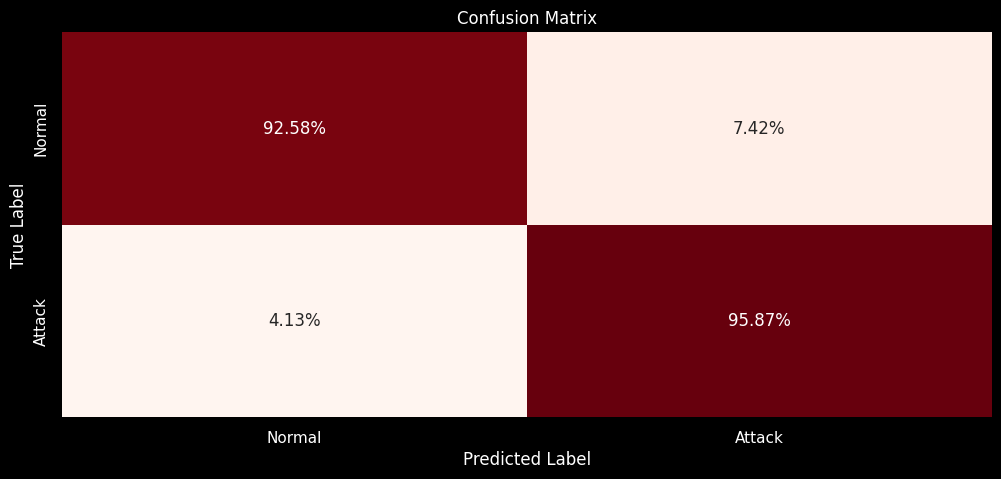

In [723]:
plot_conf_matrix(conf_matrix_best)

In [724]:
thresholds = np.arange(0.1, 0.9, 0.05)

results_rf = []

for t in thresholds:
    y_pred_t = (y_proba_rf >= t).astype(int)
    results_rf.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t),
        "balanced_acc": balanced_accuracy_score(y_test, y_pred_t)
    })

rf_threshold_df = pd.DataFrame(results_rf)
rf_threshold_df

,threshold,precision,recall,f1,balanced_acc
0,0.10,0.987522,0.998532,0.992996,0.907064
1,0.15,0.988375,0.997268,0.992802,0.912920
2,0.20,0.989158,0.995348,0.992243,0.917948
3,0.25,0.990003,0.991600,0.990801,0.922625
4,0.30,0.991542,0.983704,0.987607,0.930529
5,0.35,0.992470,0.977711,0.985035,0.934645
6,0.40,0.993722,0.968884,0.981146,0.939713
7,0.45,0.994206,0.963873,0.978805,0.940888
8,0.50,0.994730,0.958666,0.976365,0.942215
9,0.55,0.995080,0.954713,0.974479,0.942859


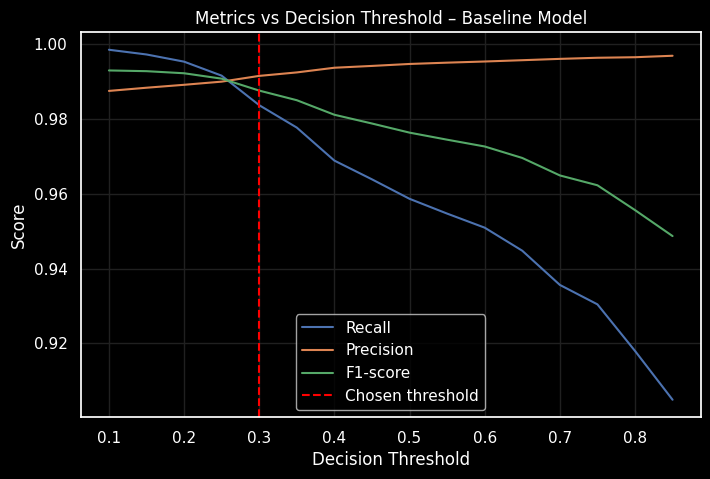

In [725]:
plt.figure(figsize=(8, 5))
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['recall'], label='Recall')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['precision'], label='Precision')
plt.plot(rf_threshold_df['threshold'], rf_threshold_df['f1'], label='F1-score')

plt.axvline(x=0.30, linestyle='--', color='red', label='Chosen threshold')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Decision Threshold – Baseline Model")
plt.legend()
plt.grid(True)
plt.show()

In [728]:
best_t = rf_threshold_df.loc[rf_threshold_df['balanced_acc'].idxmax(), 'threshold']

y_pred_best = (y_proba_rf >= best_t).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

display(conf_matrix_best)
metrics = {
        "accuracy": accuracy_score(y_test, y_pred_best),
        "precision": precision_score(y_test, y_pred_best),
        "recall": recall_score(y_test, y_pred_best),
        "f1_score": f1_score(y_test, y_pred_best),
        "balanced_accuracy_score": balanced_accuracy_score(y_test, y_pred_best)
    } 
metric_pd = pd.DataFrame([metrics])
display(metric_pd)

array([[  7499,    516],
       [  5746, 111396]])

,accuracy,precision,recall,f1_score,balanced_accuracy_score
0,0.949967,0.995389,0.950948,0.972661,0.943285


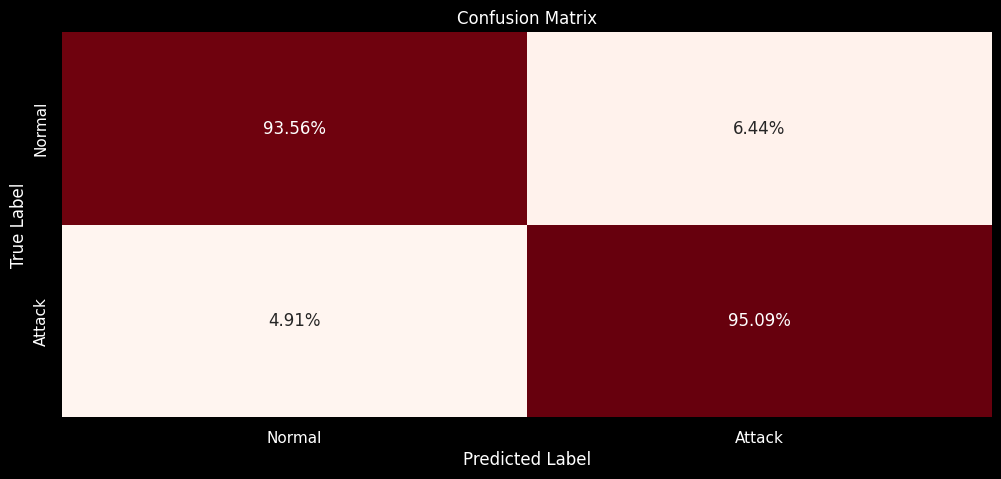

In [729]:
plot_conf_matrix(conf_matrix_best)